## Changes to SAA and Membership age as a result of Mergers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
merged_df = pd.read_excel('Propensity.xlsx')

In [4]:
list(merged_df.keys())

['Period',
 'Fund name',
 'ABN',
 '<25%',
 '25 to 34%',
 '35 to 44%',
 '45 to 49%',
 '50 to 54%',
 '55 to 59%',
 '60 to 64%',
 '65 to 69%',
 '70 to 74%',
 '75 to 84%',
 '85+%',
 '<$1,000%',
 '$1,000 to $24,999%',
 '$25,000 to $49,000%',
 '$50,000 to $99,999%',
 '$100,000 to $199,999%',
 '$200,000 to $499,999%',
 '$500,000 to $999,999%',
 '$1,000,000+%',
 'Proportion of investments in cash',
 'Proportion of investments in  fixed income',
 'Proportion of investments in equity',
 'Proportion of investments in property',
 'Proportion of investments in infrastructure',
 'Proportion of investments in commodities',
 'Proportion of investments in other',
 'Merger',
 'Merged',
 'Acquirer']

In [5]:
excel_file_path = 'Merged SF Annual Data.xlsx'

all_dfs = pd.read_excel(excel_file_path, sheet_name=None)

In [6]:
list(all_dfs.keys())

['Annual', 'Quarterly', 'Merger List', 'Fail', 'Sheet1']

In [7]:
fail = all_dfs['Fail']

In [8]:
merged_df = pd.merge(merged_df, fail, on=['Period', 'Fund name', 'ABN'], how='left')

merged_df[['Fail']] = merged_df[['Fail']].fillna(0)

In [9]:
short_saa_labels = ['Cash', 'Fixed Income', 'Equity', 'Property', 'Infrastructure', 'Commodities', 'Other']

short_age_labels = ['<25', '25 to 34','35 to 44','45 to 49', '50 to 54', '55 to 59', '60 to 64', '65 to 69', '70 to 74','75 to 84','85+']

## Asset Allocation Between Target and Acquiring Funds

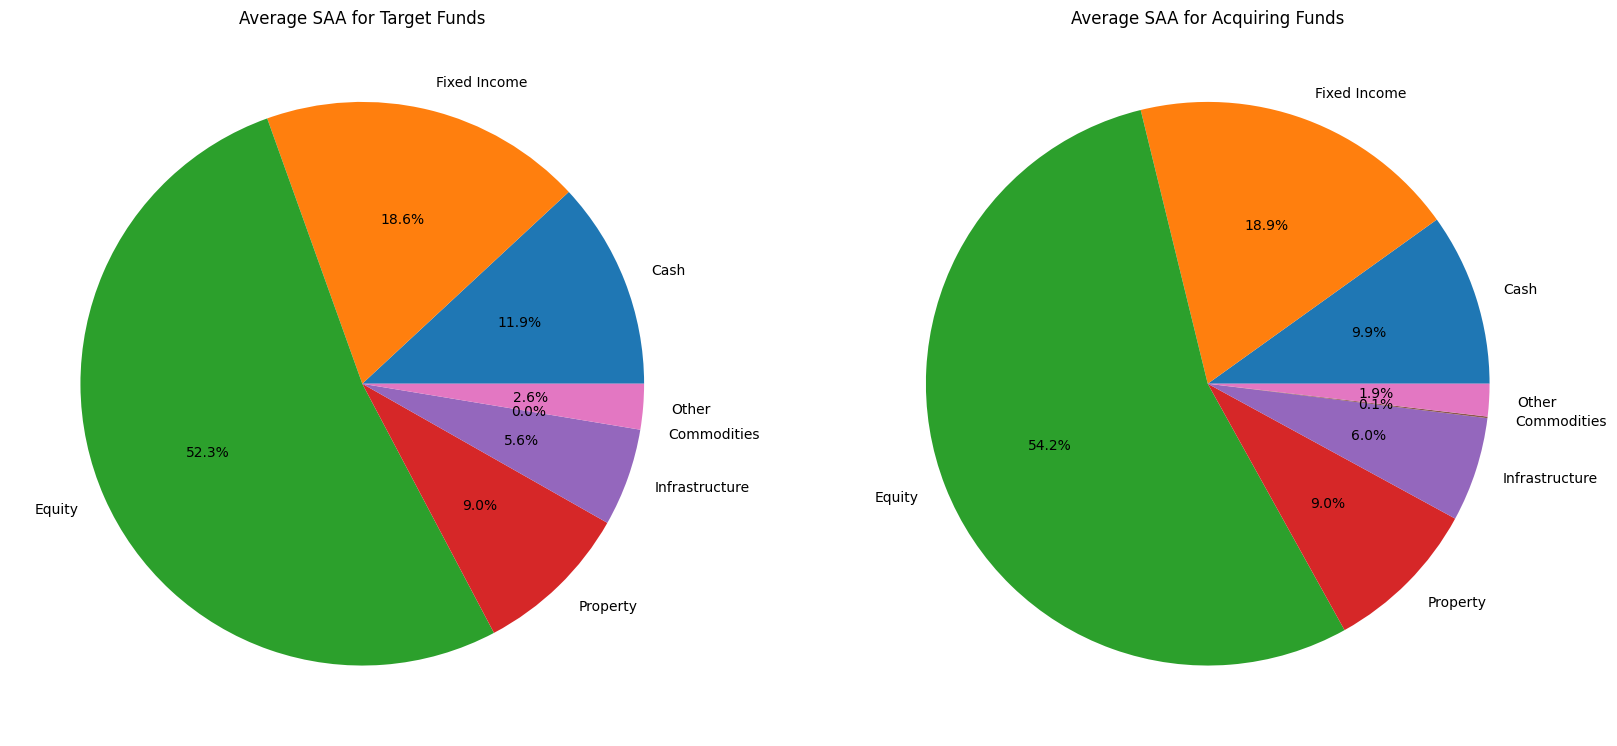

In [18]:
# Filter DataFrames
merged_funds = merged_df[merged_df['Merged'] == 1]
merger_funds = merged_df[merged_df['Merger'] == 1]

# Columns to consider for SAA
saa_columns = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]

# Calculate the average SAA for merged and merger funds
avg_saa_merged = merged_funds[saa_columns].mean()
avg_saa_merger = merger_funds[saa_columns].mean()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for Merged = 1
axes[0].pie(avg_saa_merged, labels=short_saa_labels, autopct='%1.1f%%')
axes[0].set_title('Average SAA for Target Funds')

# Pie chart for Merger = 1
axes[1].pie(avg_saa_merger, labels=short_saa_labels, autopct='%1.1f%%')
axes[1].set_title('Average SAA for Acquiring Funds')

plt.show()

In [19]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_merged = avg_saa_merged / avg_saa_merged.sum()
avg_saa_merger = avg_saa_merger / avg_saa_merger.sum()
avg_saa_all = avg_saa_all / avg_saa_all.sum()
avg_age_all = avg_age_all / avg_age_all.sum()

NameError: name 'avg_saa_all' is not defined

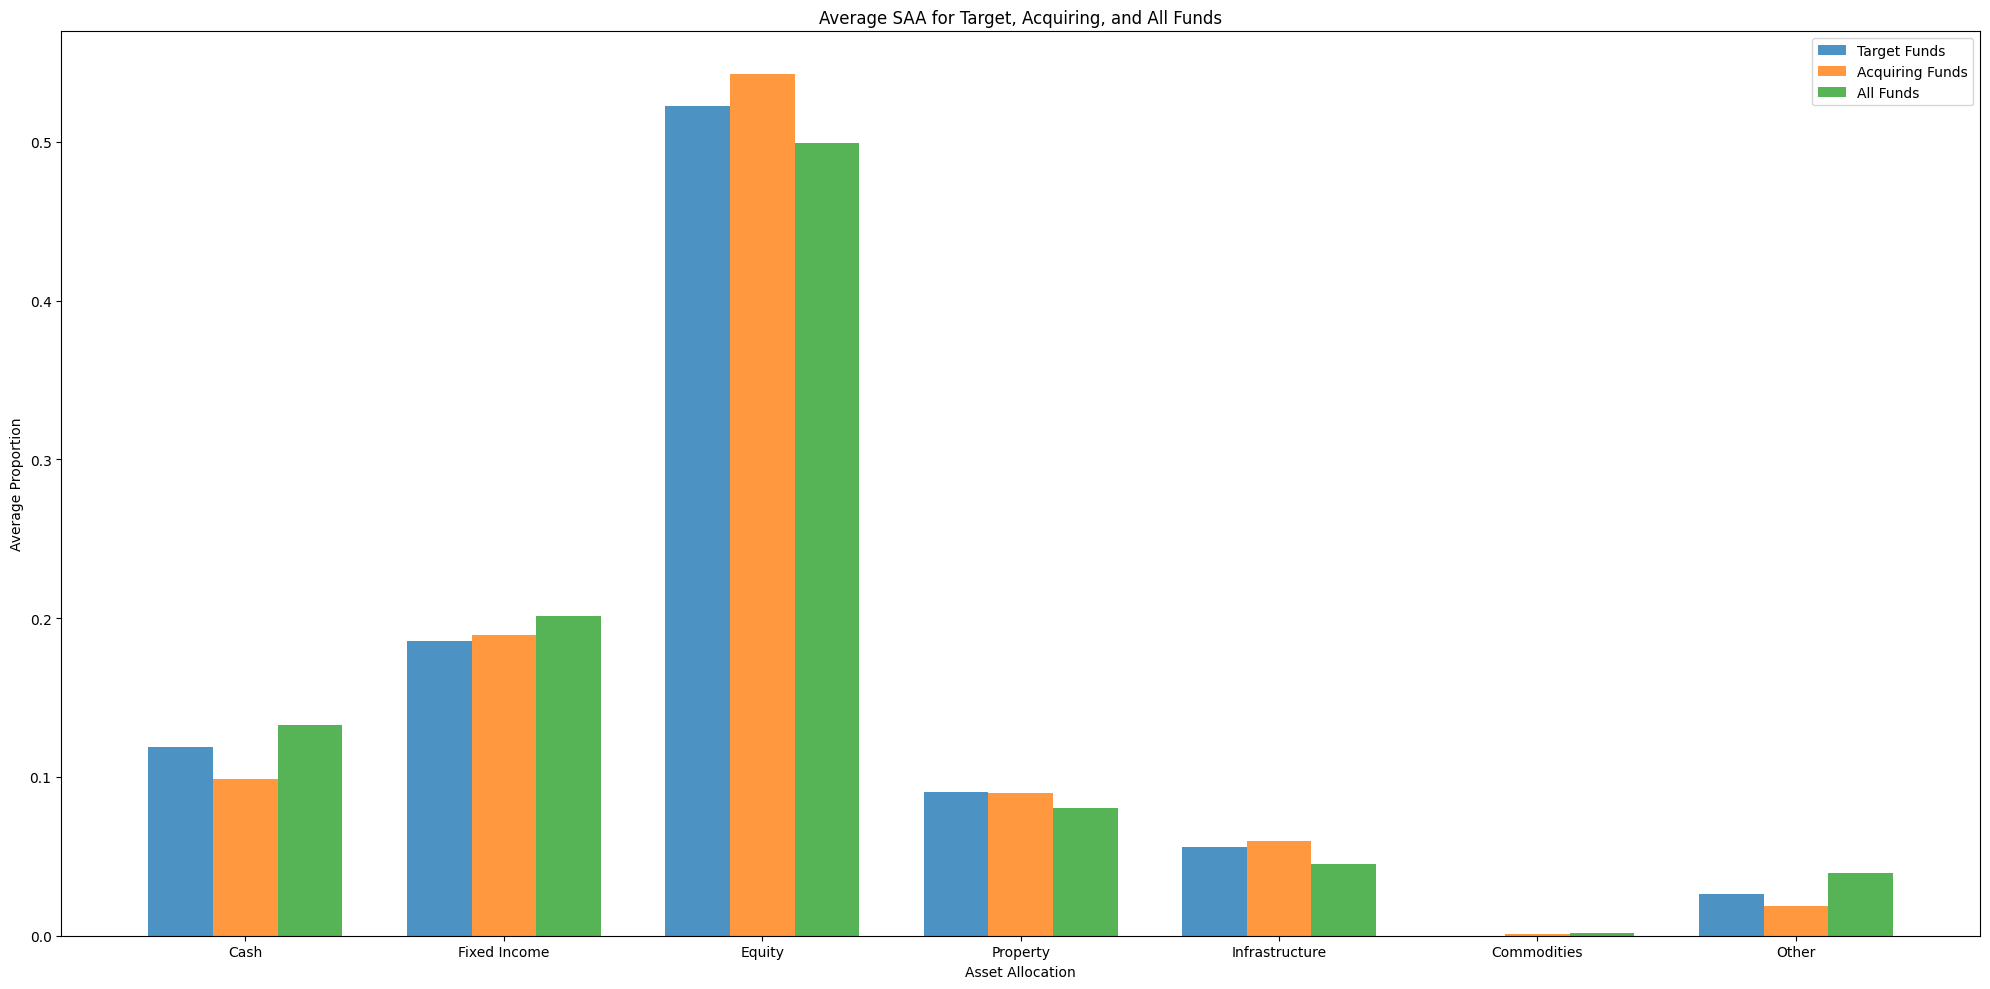

Total for Target Funds: 0.9999999999999999
Total for Acquiring Funds: 0.9999999999999999
Total for All Funds: 0.9999546827794564


In [20]:
# Filter rows where more than one column is equal to 0
filtered_df = merged_df[saa_columns][merged_df[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data
avg_saa_all = filtered_df.mean()

# Shorter labels for the asset allocation categories
short_saa_labels = ['Cash', 'Fixed Income', 'Equity', 'Property', 'Infrastructure', 'Commodities', 'Other']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.25  # Reduced width to fit the third bar
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_merged, bar_width, label='Target Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_merger, bar_width, label='Acquiring Funds', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_saa_all, bar_width, label='All Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA for Target, Acquiring, and All Funds')
plt.xticks(index + bar_width, short_saa_labels)  # Position the asset allocation labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Function to calculate the total sum for a set of bars
def calculate_total(bars):
    return sum([bar.get_height() for bar in bars])

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

In [21]:
from scipy.stats import ttest_ind

# Perform t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_ind(merged_funds[column], merger_funds[column])
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")


t-test for Proportion of investments in cash: t = 1.26, p = 0.2133
t-test for Proportion of investments in  fixed income: t = -0.69, p = 0.4921
t-test for Proportion of investments in equity: t = -1.56, p = 0.1256
t-test for Proportion of investments in property: t = -0.40, p = 0.6946
t-test for Proportion of investments in infrastructure: t = -0.61, p = 0.5433
t-test for Proportion of investments in commodities: t = -1.52, p = 0.1369
t-test for Proportion of investments in other: t = 0.90, p = 0.3731


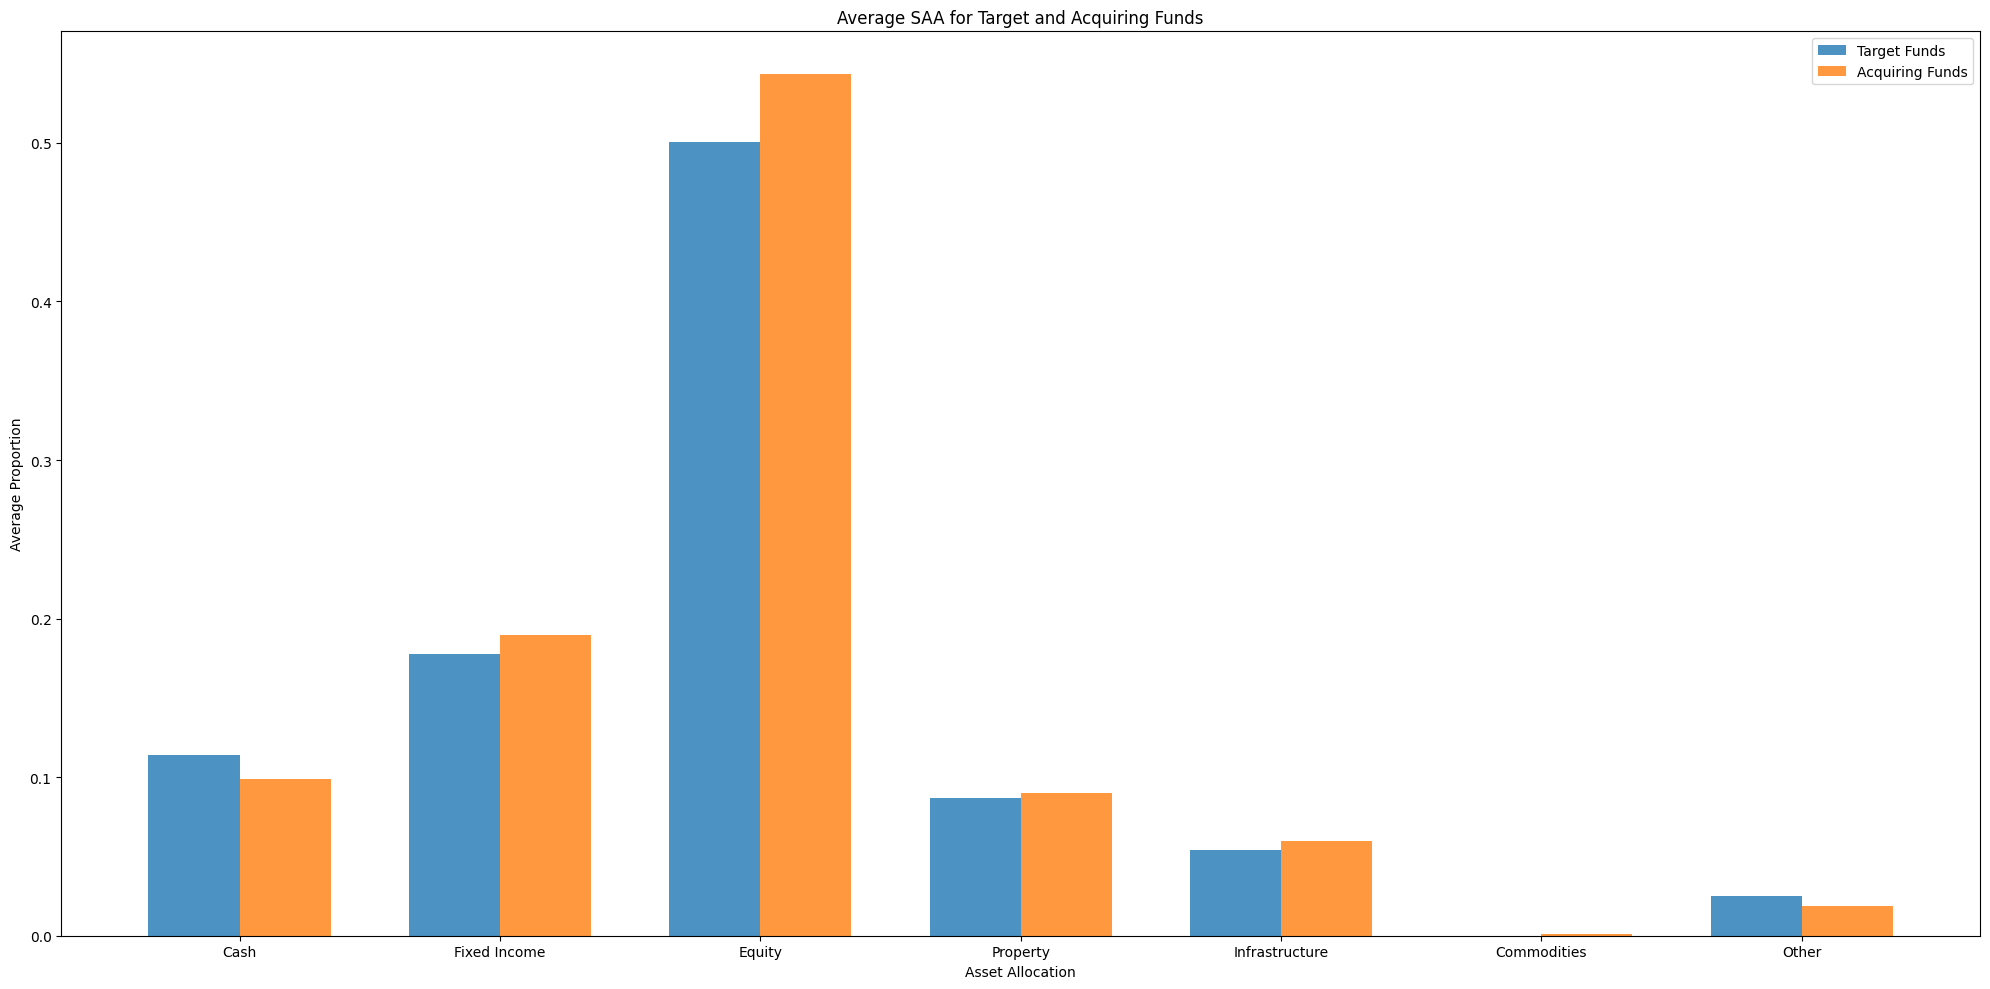

In [70]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_merged, bar_width, label='Target Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_merger, bar_width, label='Acquiring Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA for Target and Acquiring Funds')
plt.xticks(index + bar_width / 2, short_saa_labels)  # Position the asset allocation labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## Age of Members Between Target and Acquiring Funds

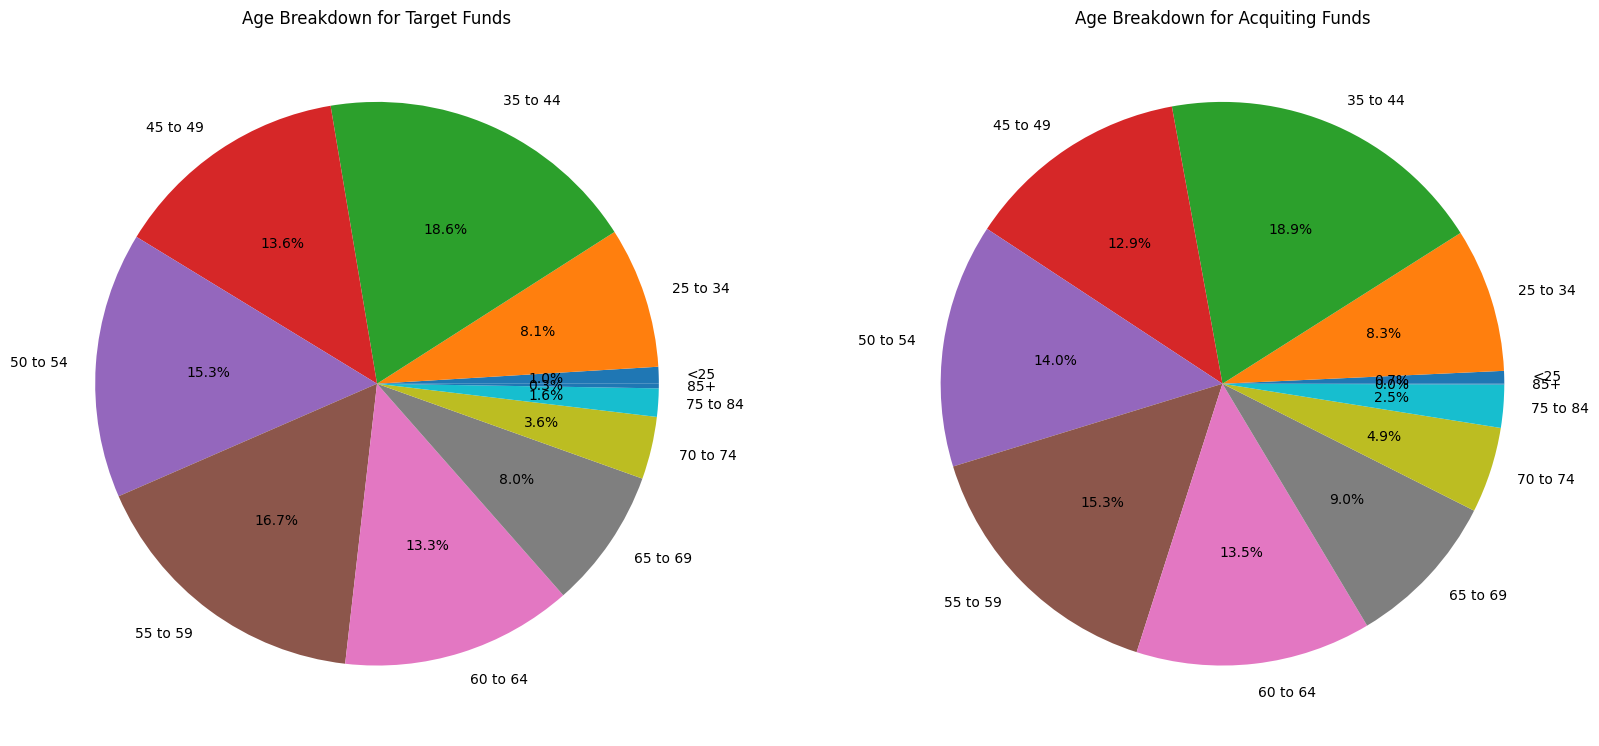

In [22]:
# Filter DataFrames
merged_funds = merged_df[merged_df['Merged'] == 1]
merger_funds = merged_df[merged_df['Merger'] == 1]

# Columns to consider for SAA
saa_columns = [
    '<25%',
 '25 to 34%',
 '35 to 44%',
 '45 to 49%',
 '50 to 54%',
 '55 to 59%',
 '60 to 64%',
 '65 to 69%',
 '70 to 74%',
 '75 to 84%',
 '85+%'
]

# Calculate the average SAA for merged and merger funds
avg_saa_merged = merged_funds[saa_columns].mean()
avg_saa_merger = merger_funds[saa_columns].mean()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for Merged = 1
axes[0].pie(avg_saa_merged, labels=short_age_labels, autopct='%1.1f%%')
axes[0].set_title('Age Breakdown for Target Funds')

# Pie chart for Merger = 1
axes[1].pie(avg_saa_merger, labels=short_age_labels, autopct='%1.1f%%')
axes[1].set_title('Age Breakdown for Acquiting Funds')

plt.show()

In [23]:
# Perform t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_ind(merged_funds[column], merger_funds[column])
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")

t-test for <25%: t = 0.71, p = 0.4830
t-test for 25 to 34%: t = -0.38, p = 0.7044
t-test for 35 to 44%: t = -0.60, p = 0.5539
t-test for 45 to 49%: t = 0.21, p = 0.8352
t-test for 50 to 54%: t = 0.58, p = 0.5631
t-test for 55 to 59%: t = 0.48, p = 0.6310
t-test for 60 to 64%: t = -0.65, p = 0.5182
t-test for 65 to 69%: t = -1.27, p = 0.2103
t-test for 70 to 74%: t = -2.00, p = 0.0519
t-test for 75 to 84%: t = -1.58, p = 0.1221
t-test for 85+%: t = 0.91, p = 0.3672


In [79]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_merged = avg_saa_merged / avg_saa_merged.sum()
avg_saa_merger = avg_saa_merger / avg_saa_merger.sum()
avg_saa_all = avg_saa_all / avg_saa_all.sum()
avg_age_all = avg_age_all / avg_age_all.sum()

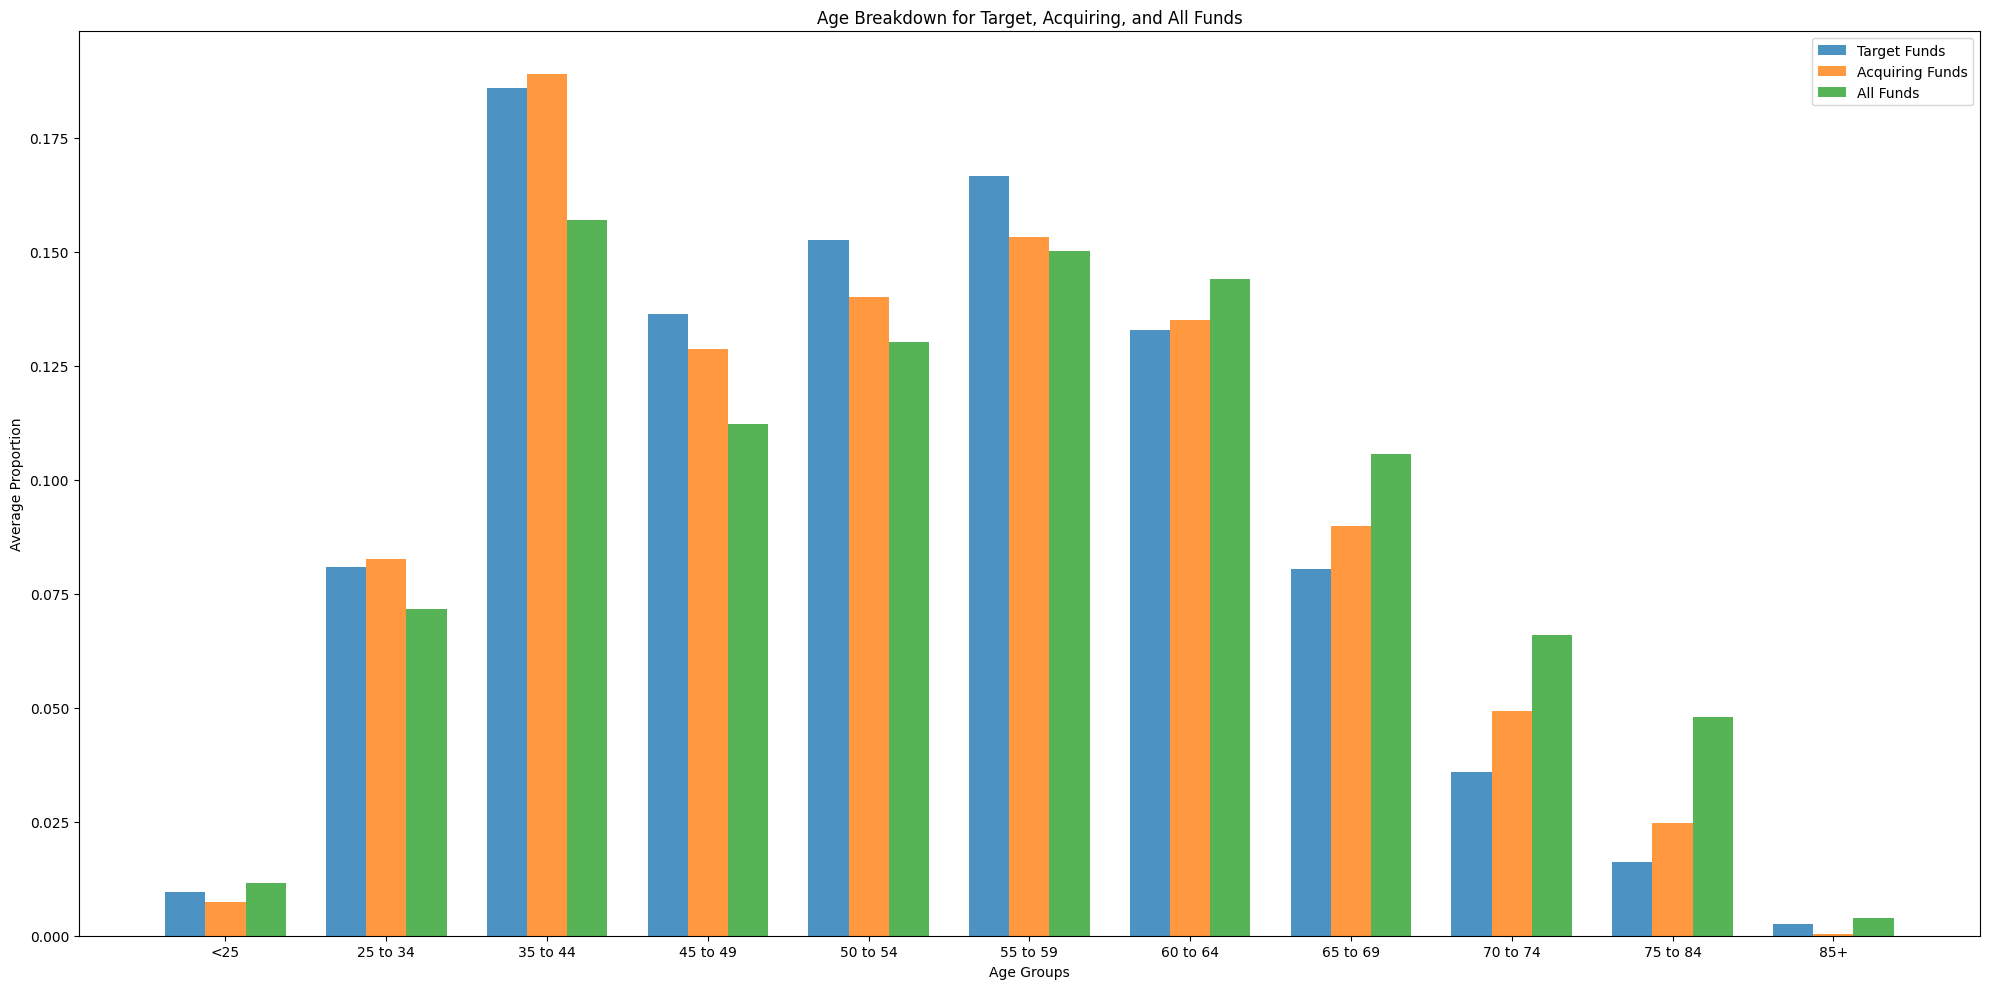

Total for Target Funds: 1.0
Total for Acquiring Funds: 1.0
Total for All Funds: 1.0


In [81]:
# Filter rows where more than one column is equal to 0
filtered_df = merged_df[saa_columns][merged_df[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data
avg_saa_all = filtered_df.mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.25  # Reduced width to fit the third bar
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_merged, bar_width, label='Target Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_merger, bar_width, label='Acquiring Funds', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_age_all, bar_width, label='All Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Age Breakdown for Target, Acquiring, and All Funds')
plt.xticks(index + bar_width, short_age_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

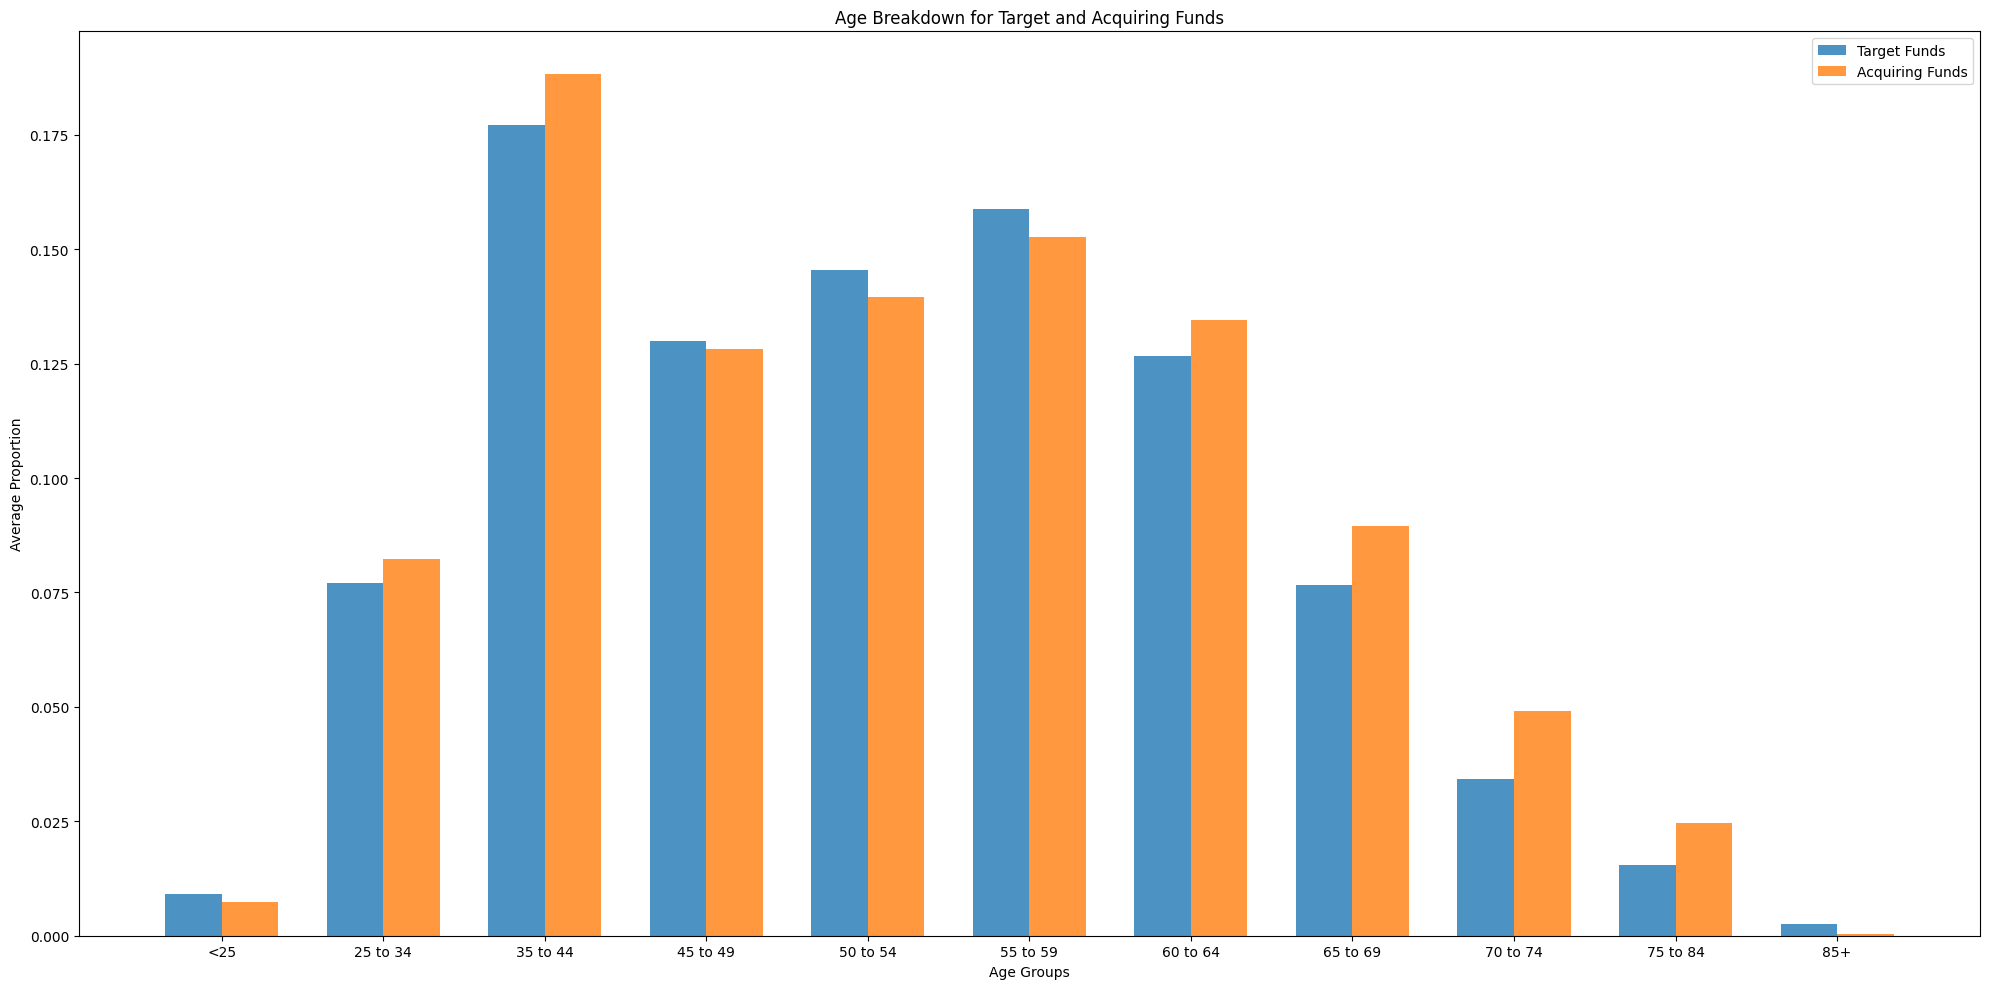

In [14]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_merged, bar_width, label='Target Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_merger, bar_width, label='Acquiring Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Age Breakdown for Target and Acquiring Funds')
plt.xticks(index + bar_width / 2, short_age_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## Average SAA Pre and Post Merger

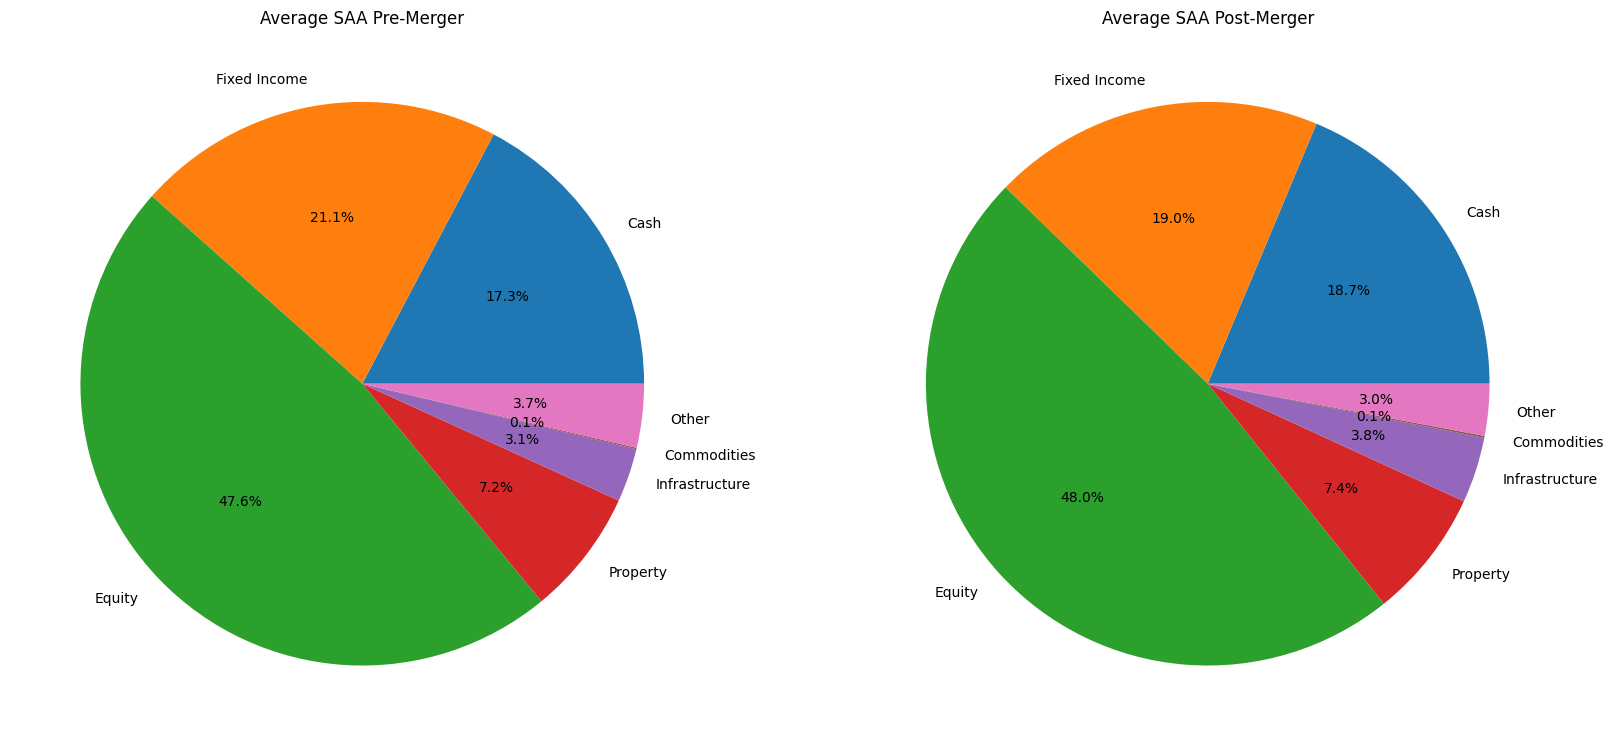

In [24]:
# Columns to consider for SAA
saa_columns = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]

# Filter and sort DataFrame
merger_funds = merged_df.sort_values(by=['Fund name', 'Period'])

def get_merger_data(group):
    # Find the row where 'Merger' is 1
    merger_row = group[group['Merger'] == 1]
    
    # If no merger row is found, return None for both pre and post-merger data
    if merger_row.empty:
        return None, None
    
    # Extract post-merger data
    post_merger_data = merger_row[saa_columns].iloc[0]
    
    # Find the index of the merger row within the group
    merger_index = group.index.get_loc(merger_row.index[0])
    
    # If the merger row is the first row, there's no pre-merger data
    if merger_index == 0:
        pre_merger_data = None
    else:
        # Otherwise, get the row immediately preceding the merger row
        pre_merger_data = group.iloc[merger_index - 1][saa_columns]
    
    return pre_merger_data, post_merger_data

# Apply the function to each group
merger_data = merger_funds.groupby('Fund name').apply(get_merger_data)

# Extract pre-merger and post-merger data
pre_merger_data = [data[0] for data in merger_data if data[0] is not None]
post_merger_data = [data[1] for data in merger_data if data[1] is not None]

# Calculate the average SAA for pre-merger and post-merger periods
avg_saa_pre_merger = merger_funds.groupby('Fund name').apply(lambda x: x.iloc[:-1][saa_columns].mean()).mean()
avg_saa_post_merger = merger_funds.groupby('Fund name').apply(lambda x: x.iloc[-1][saa_columns]).mean()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for pre-merger
axes[0].pie(avg_saa_pre_merger, labels=short_saa_labels, autopct='%1.1f%%')
axes[0].set_title('Average SAA Pre-Merger')

# Pie chart for post-merger
axes[1].pie(avg_saa_post_merger, labels=short_saa_labels, autopct='%1.1f%%')
axes[1].set_title('Average SAA Post-Merger')

plt.show()

In [25]:
from scipy.stats import ttest_rel

# Convert pre-merger and post-merger data lists to DataFrames
pre_merger_df = pd.DataFrame(pre_merger_data, columns=saa_columns)
post_merger_df = pd.DataFrame(post_merger_data, columns=saa_columns)

# Perform paired t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_rel(pre_merger_df[column], post_merger_df[column], nan_policy='omit')  # omit NaN values
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")


t-test for Proportion of investments in cash: t = 0.22, p = 0.8275
t-test for Proportion of investments in  fixed income: t = 0.21, p = 0.8333
t-test for Proportion of investments in equity: t = -0.25, p = 0.8062
t-test for Proportion of investments in property: t = -1.15, p = 0.2711
t-test for Proportion of investments in infrastructure: t = -1.66, p = 0.1202
t-test for Proportion of investments in commodities: t = 0.56, p = 0.5816
t-test for Proportion of investments in other: t = 0.94, p = 0.3636


In [123]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_all = avg_saa_all / avg_saa_all.sum()
avg_age_all = avg_age_all / avg_age_all.sum()
avg_saa_pre_merger = avg_saa_pre_merger / avg_saa_pre_merger.sum()
avg_saa_post_merger = avg_saa_post_merger / avg_saa_post_merger.sum()

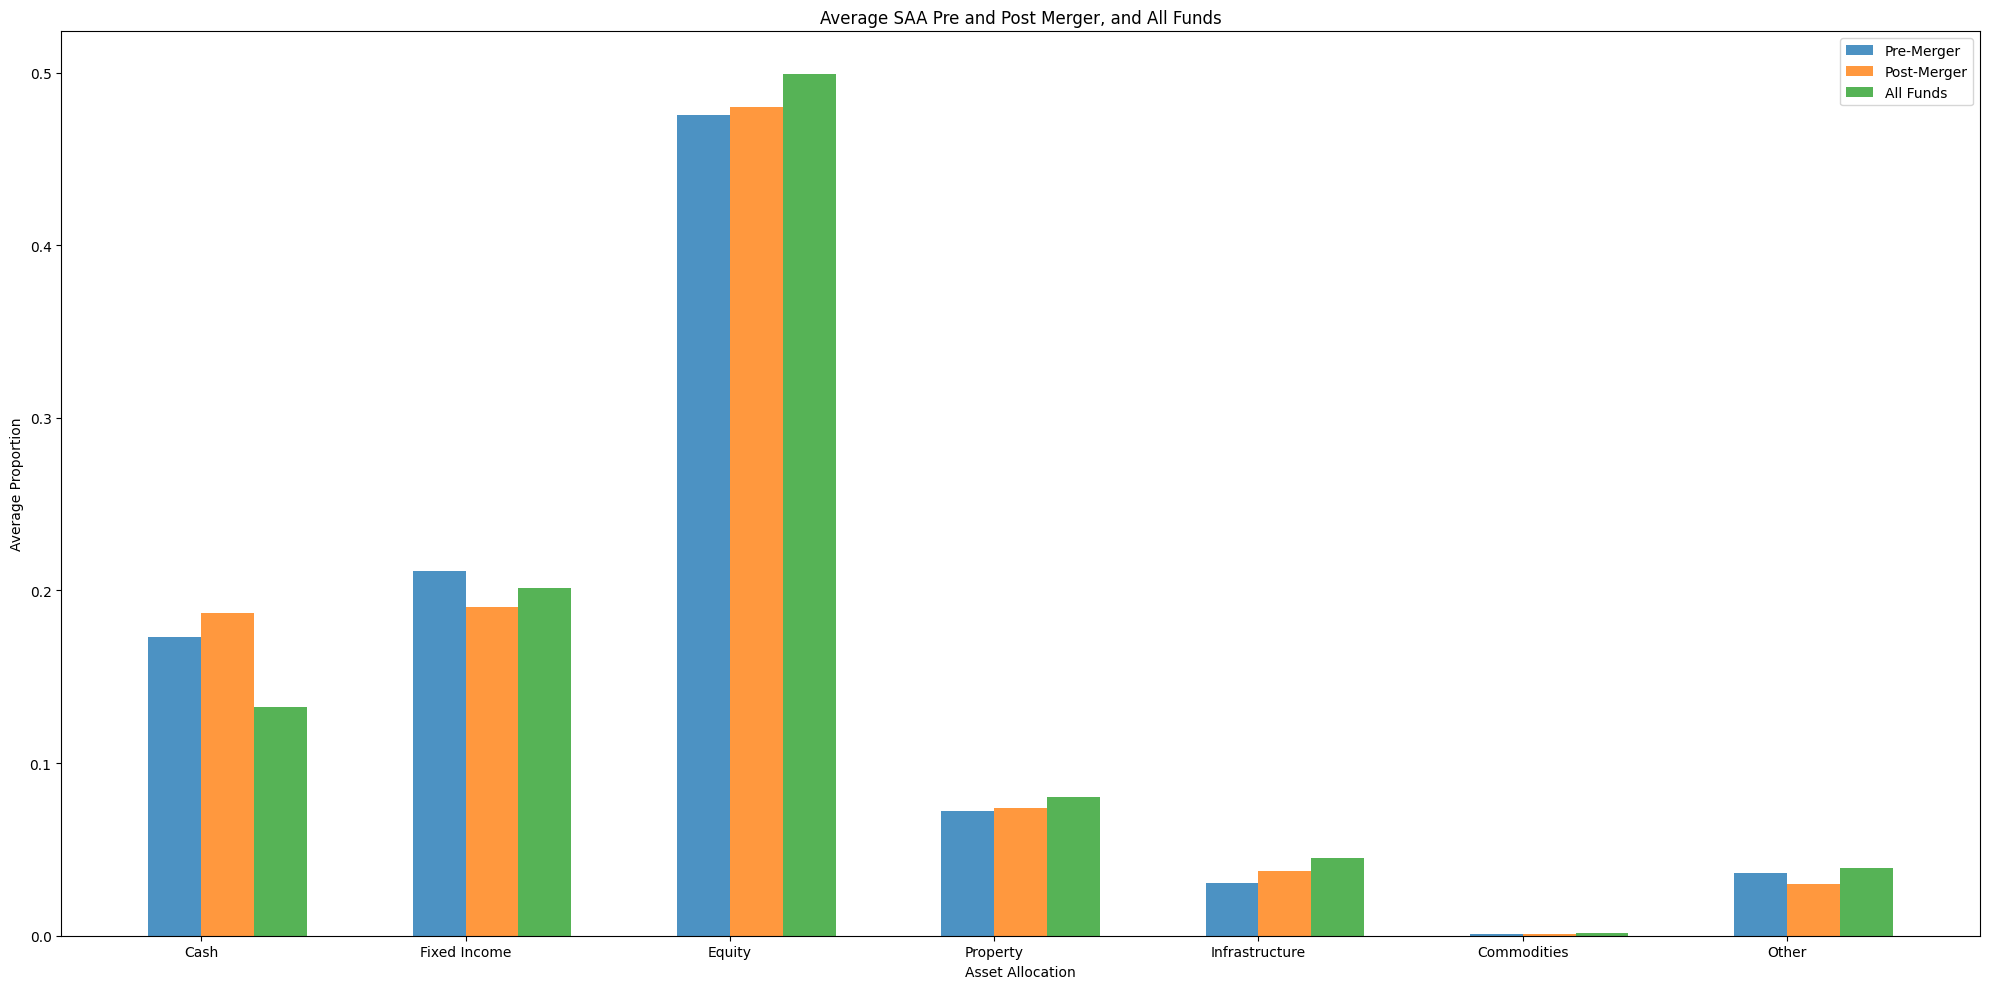

Total for Target Funds: 1.0
Total for Acquiring Funds: 1.0
Total for All Funds: 0.9999546827794564


In [124]:
# Filter rows where more than one column is equal to 0
filtered_df = merged_df[saa_columns][merged_df[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data
avg_saa_all = filtered_df.mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.20
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_pre_merger, bar_width, label='Pre-Merger', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_post_merger, bar_width, label='Post-Merger', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_saa_all, bar_width, label='All Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA Pre and Post Merger, and All Funds')
plt.xticks(index + bar_width / 2, short_saa_labels)  # Position the asset allocation labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

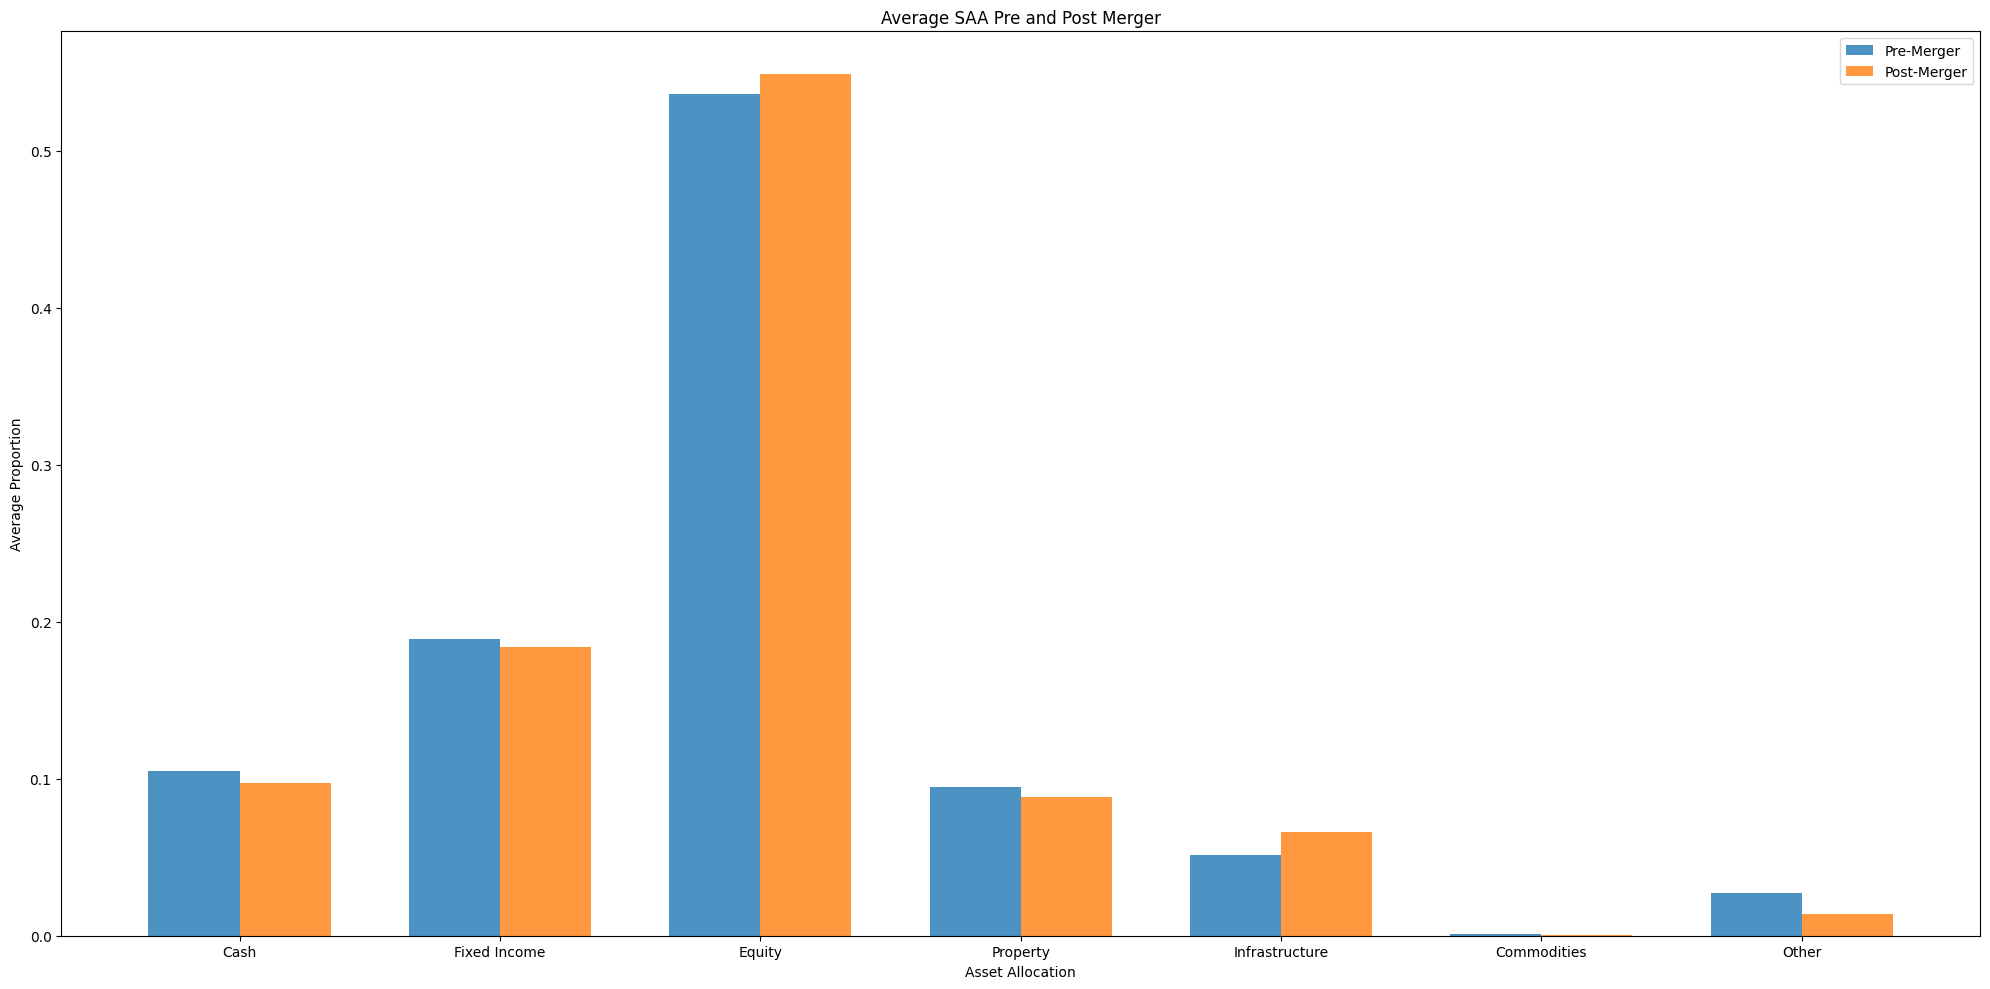

In [19]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_pre_merger, bar_width, label='Pre-Merger', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_post_merger, bar_width, label='Post-Merger', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA Pre and Post Merger')
plt.xticks(index + bar_width / 2, short_saa_labels)  # Position the asset allocation labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## Average Age of Members Pre and Post Merger

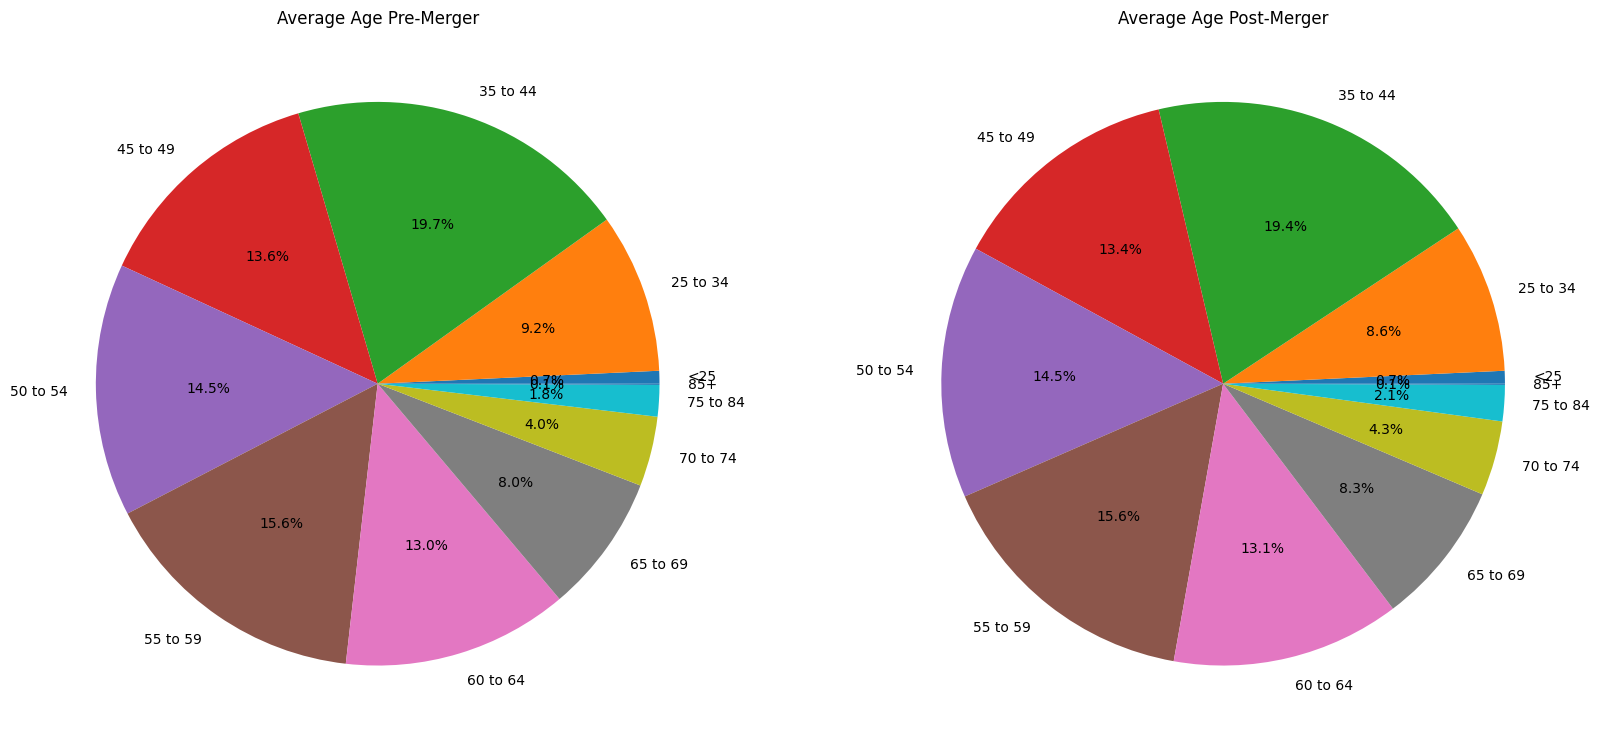

In [33]:
# Columns to consider for Age
saa_columns = [
    '<25%',
    '25 to 34%',
    '35 to 44%',
    '45 to 49%',
    '50 to 54%',
    '55 to 59%',
    '60 to 64%',
    '65 to 69%',
    '70 to 74%',
    '75 to 84%',
    '85+%'
]

# Filter and sort DataFrame
merger_funds = merged_df.sort_values(by=['Fund name', 'Period'])

def get_merger_data(group):
    # Find the row where 'Merger' is 1
    merger_row = group[group['Merger'] == 1]
    
    # If no merger row is found, return None for both pre and post-merger data
    if merger_row.empty:
        return None, None
    
    # Extract post-merger data
    post_merger_data = merger_row[saa_columns].iloc[0]
    
    # Find the index of the merger row within the group
    merger_index = group.index.get_loc(merger_row.index[0])
    
    # If the merger row is the first row, there's no pre-merger data
    if merger_index == 0:
        pre_merger_data = None
    else:
        # Otherwise, get the row immediately preceding the merger row
        pre_merger_data = group.iloc[merger_index - 1][saa_columns]
    
    return pre_merger_data, post_merger_data

# Apply the function to each group
merger_data = merger_funds.groupby('Fund name').apply(get_merger_data)

# Extract pre-merger and post-merger data
pre_merger_data = [data[0] for data in merger_data if data[0] is not None]
post_merger_data = [data[1] for data in merger_data if data[1] is not None]

# Calculate the average SAA for pre-merger and post-merger periods
avg_saa_pre_merger = pd.DataFrame(pre_merger_data).mean()
avg_saa_post_merger = pd.DataFrame(post_merger_data).mean()

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for pre-merger
axes[0].pie(avg_saa_pre_merger, labels=short_age_labels, autopct='%1.1f%%')
axes[0].set_title('Average Age Pre-Merger')

# Pie chart for post-merger
axes[1].pie(avg_saa_post_merger, labels=short_age_labels, autopct='%1.1f%%')
axes[1].set_title('Average Age Post-Merger')

plt.show()


In [34]:
# Convert pre-merger and post-merger data lists to DataFrames
pre_merger_df = pd.DataFrame(pre_merger_data, columns=saa_columns)
post_merger_df = pd.DataFrame(post_merger_data, columns=saa_columns)

# Perform paired t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_rel(pre_merger_df[column], post_merger_df[column], nan_policy='omit')  # omit NaN values
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")

t-test for <25%: t = -0.00, p = 1.0000
t-test for 25 to 34%: t = 1.60, p = 0.1323
t-test for 35 to 44%: t = 0.69, p = 0.4985
t-test for 45 to 49%: t = 0.82, p = 0.4243
t-test for 50 to 54%: t = -0.00, p = 1.0000
t-test for 55 to 59%: t = -0.25, p = 0.8062
t-test for 60 to 64%: t = -0.41, p = 0.6848
t-test for 65 to 69%: t = -1.23, p = 0.2377
t-test for 70 to 74%: t = -1.74, p = 0.1038
t-test for 75 to 84%: t = -1.74, p = 0.1038
t-test for 85+%: t = nan, p = nan


In [106]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_merged = avg_saa_merged / avg_saa_merged.sum()
avg_saa_merger = avg_saa_merger / avg_saa_merger.sum()
avg_saa_all = avg_saa_all / avg_saa_all.sum()
avg_age_all = avg_age_all / avg_age_all.sum()

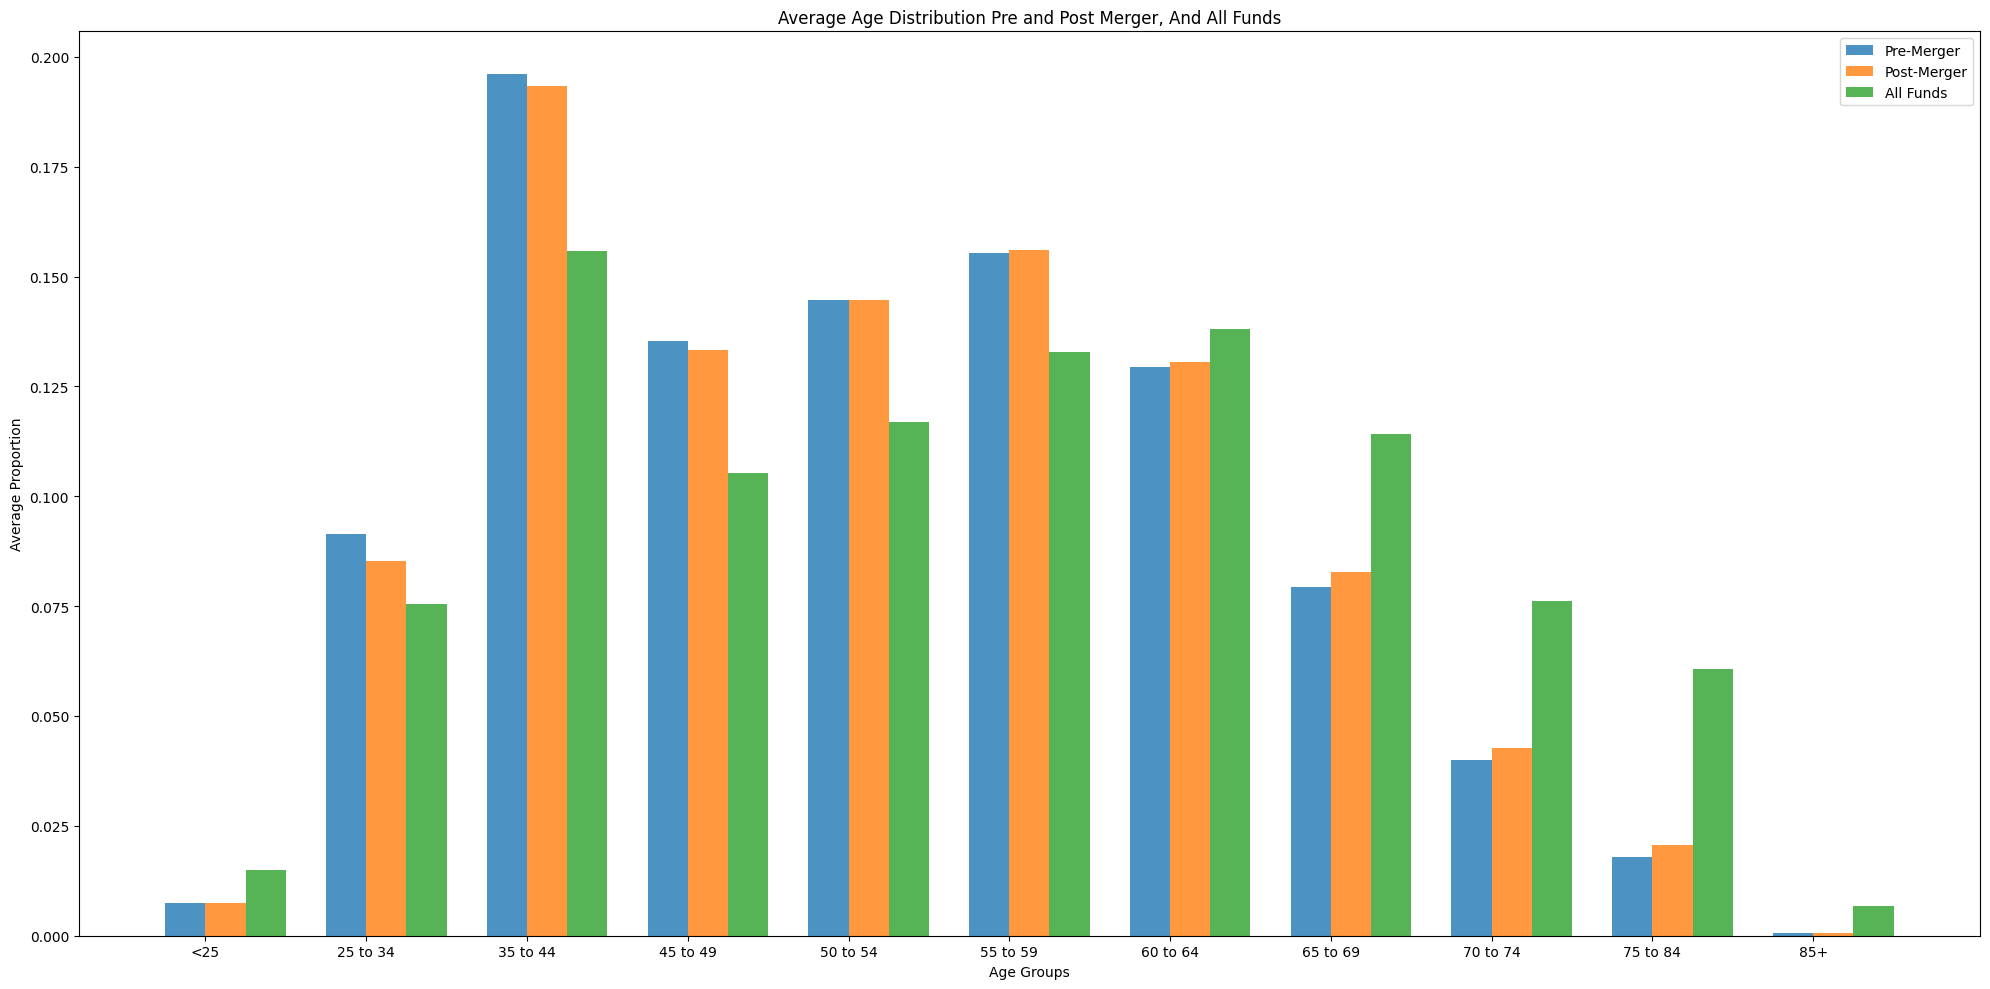

Total for Target Funds: 0.9973333333333334
Total for Acquiring Funds: 0.9973333333333334
Total for All Funds: 0.9970245398773006


In [108]:
# Filter rows where more than one column is equal to 0
filtered_df = merged_df[saa_columns][merged_df[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data
avg_age_all = filtered_df.mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_pre_merger, bar_width, label='Pre-Merger', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_post_merger, bar_width, label='Post-Merger', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_age_all, bar_width, label='All Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Average Age Distribution Pre and Post Merger, And All Funds')
plt.xticks(index + bar_width / 2, short_age_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

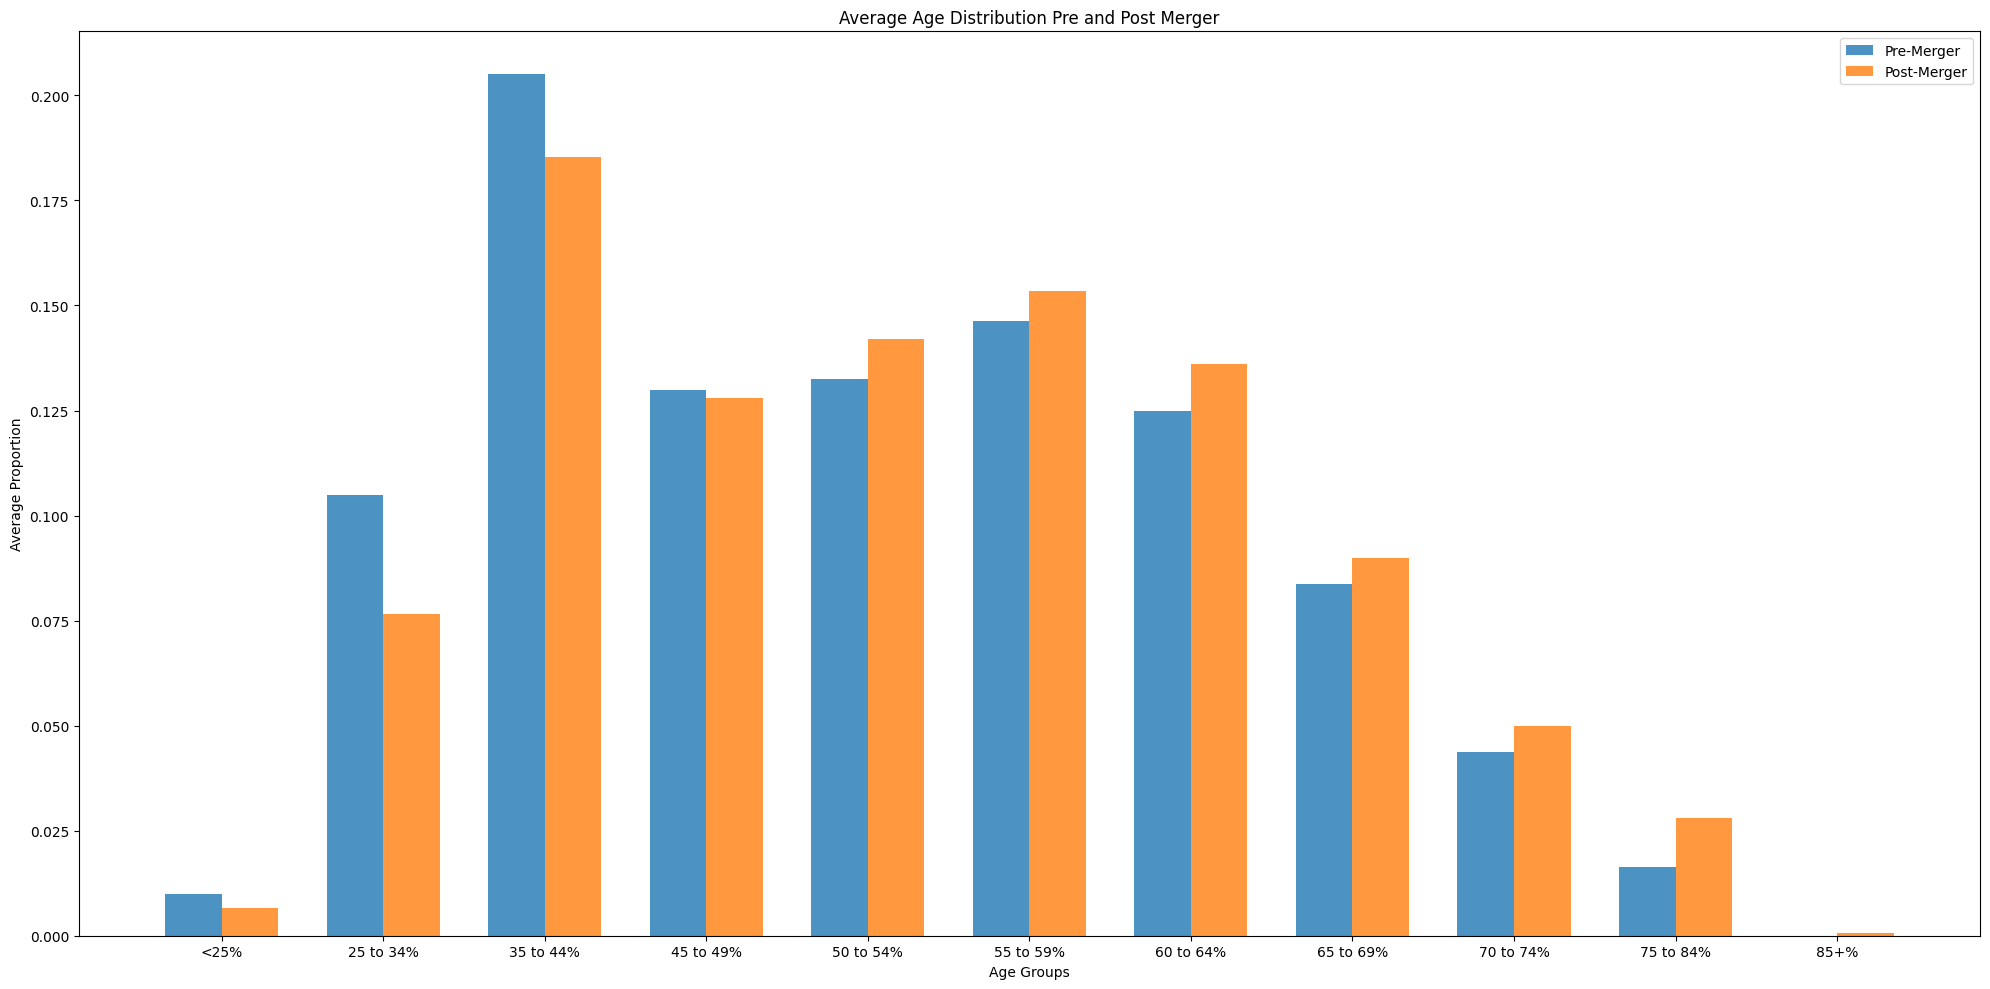

In [22]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_pre_merger, bar_width, label='Pre-Merger', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_post_merger, bar_width, label='Post-Merger', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Average Age Distribution Pre and Post Merger')
plt.xticks(index + bar_width / 2, saa_columns)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## Average SAA Between Fail and Non-fail Funds

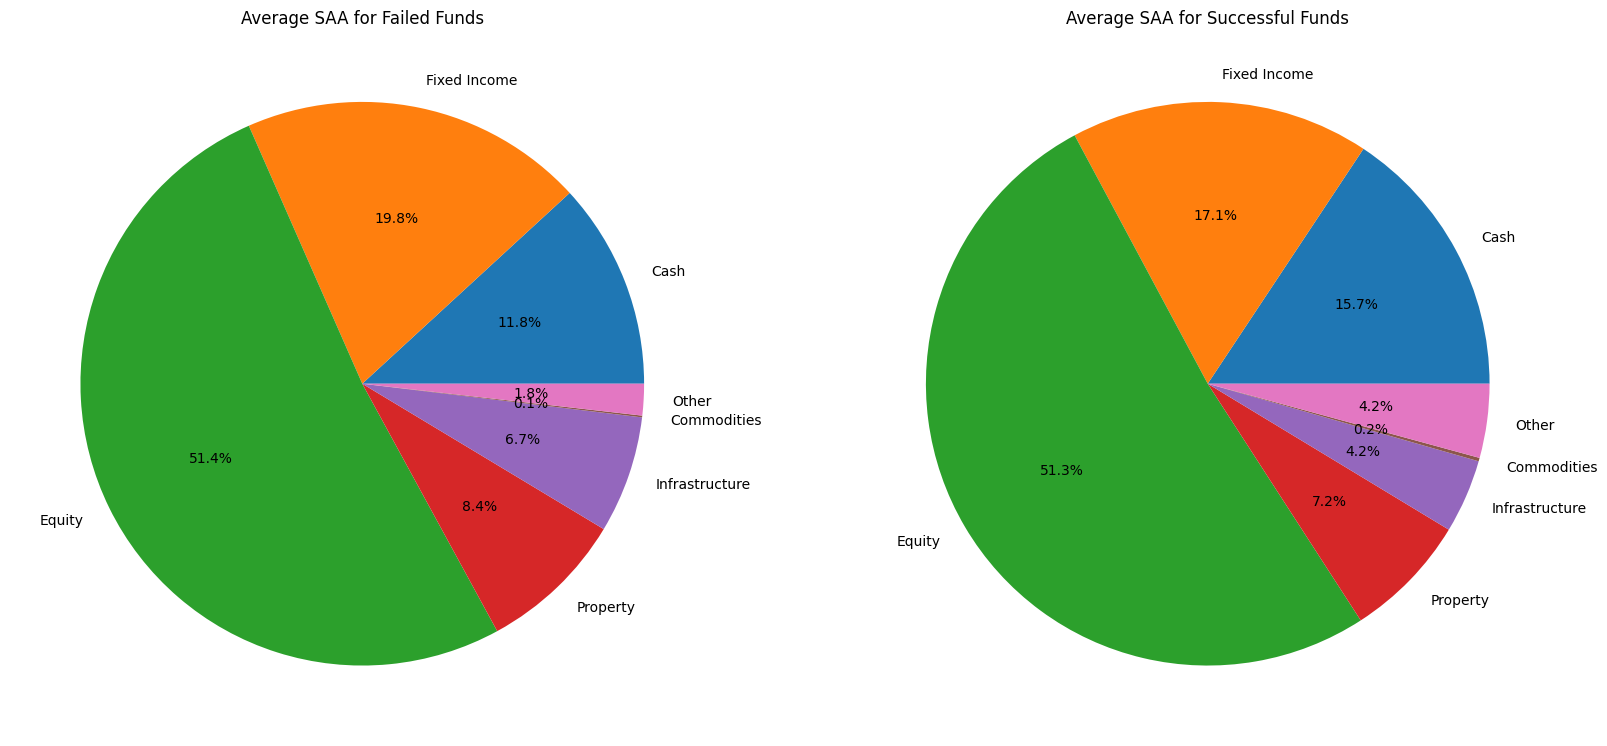

In [35]:
# Convert 'Period' to datetime
merged_df['Period'] = pd.to_datetime(merged_df['Period'], format='%d/%m/%Y')

saa_columns = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]

# Filter DataFrame for the period 2021-2022
start_date = pd.Timestamp('2021-06-30')
end_date = pd.Timestamp('2022-06-30')
funds_2021_2022 = merged_df[(merged_df['Period'] >= start_date) & (merged_df['Period'] <= end_date)]

# Separate the funds based on the 'Fail' column
failed_funds = funds_2021_2022[funds_2021_2022['Fail'] == 1]
successful_funds = funds_2021_2022[funds_2021_2022['Fail'] == 0]

# Calculate the average SAA for each group
avg_saa_failed = failed_funds[saa_columns].mean()
avg_saa_successful = successful_funds[saa_columns].mean()

# Handle NaN values
avg_saa_failed.fillna(0, inplace=True)
avg_saa_successful.fillna(0, inplace=True)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for Failed Funds
axes[0].pie(avg_saa_failed, labels=short_saa_labels, autopct='%1.1f%%')
axes[0].set_title('Average SAA for Failed Funds')

# Pie chart for Successful Funds
axes[1].pie(avg_saa_successful, labels=short_saa_labels, autopct='%1.1f%%')
axes[1].set_title('Average SAA for Successful Funds')

plt.show()

In [36]:
from scipy.stats import ttest_ind

# Perform t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_ind(failed_funds[column], successful_funds[column], nan_policy='omit')  # omit NaN values
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")


t-test for Proportion of investments in cash: t = -0.34, p = 0.7375
t-test for Proportion of investments in  fixed income: t = 1.52, p = 0.1292
t-test for Proportion of investments in equity: t = 0.88, p = 0.3785
t-test for Proportion of investments in property: t = 1.46, p = 0.1467
t-test for Proportion of investments in infrastructure: t = 2.31, p = 0.0215
t-test for Proportion of investments in commodities: t = -0.30, p = 0.7622
t-test for Proportion of investments in other: t = -0.47, p = 0.6357


In [15]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_failed = avg_saa_failed / avg_saa_failed.sum()
avg_saa_successful = avg_saa_successful / avg_saa_successful.sum()
avg_age_2021_2022 = avg_age_2021_2022 / avg_age_2021_2022.sum()
avg_saa_2021_2022 = avg_saa_2021_2022 / avg_saa_2021_2022.sum()

NameError: name 'avg_age_2021_2022' is not defined

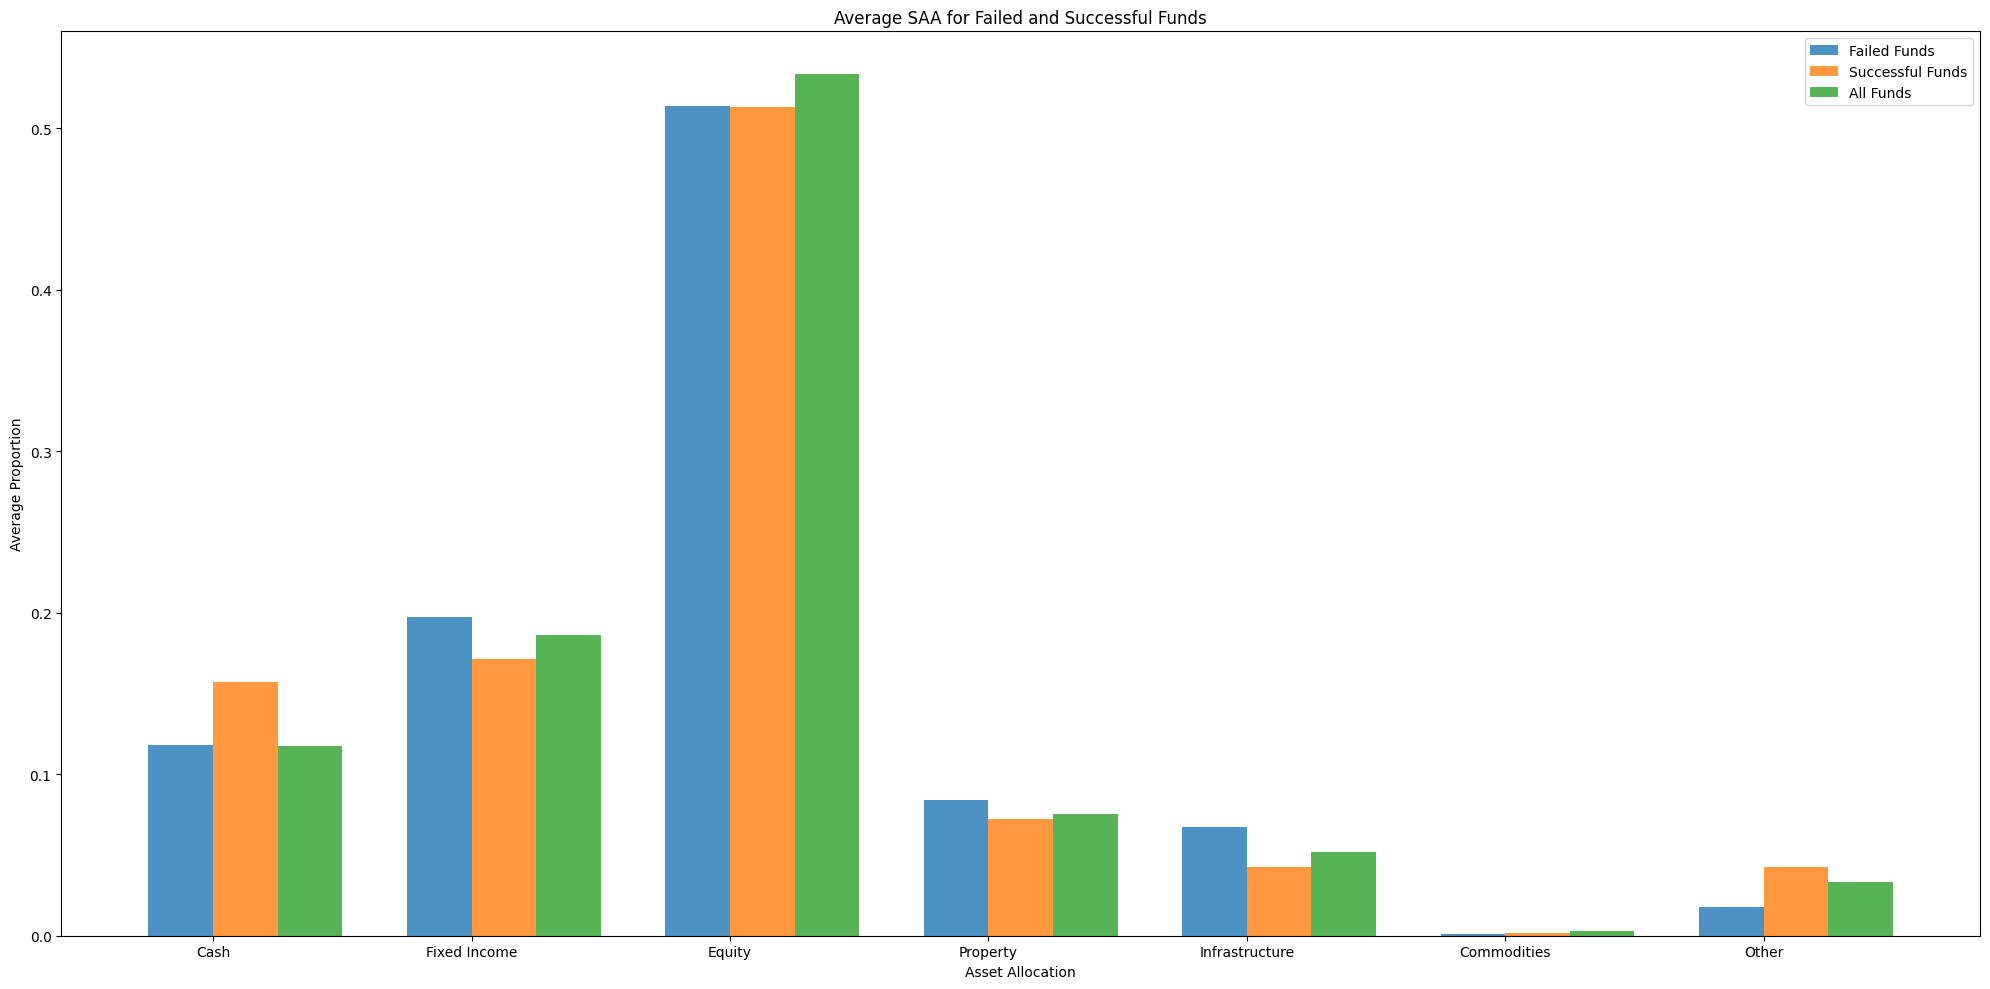

NameError: name 'calculate_total' is not defined

In [17]:
# From the above filtered data, further filter rows where more than one column is equal to 0
filtered_df_2021_2022 = funds_2021_2022[saa_columns][funds_2021_2022[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data in the specified time frame
avg_saa_2021_2022 = filtered_df_2021_2022.mean()

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_failed, bar_width, label='Failed Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_successful, bar_width, label='Successful Funds', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_saa_2021_2022, bar_width, label='All Funds', alpha=0.8)


# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA for Failed and Successful Funds')
plt.xticks(index + bar_width / 2, short_saa_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

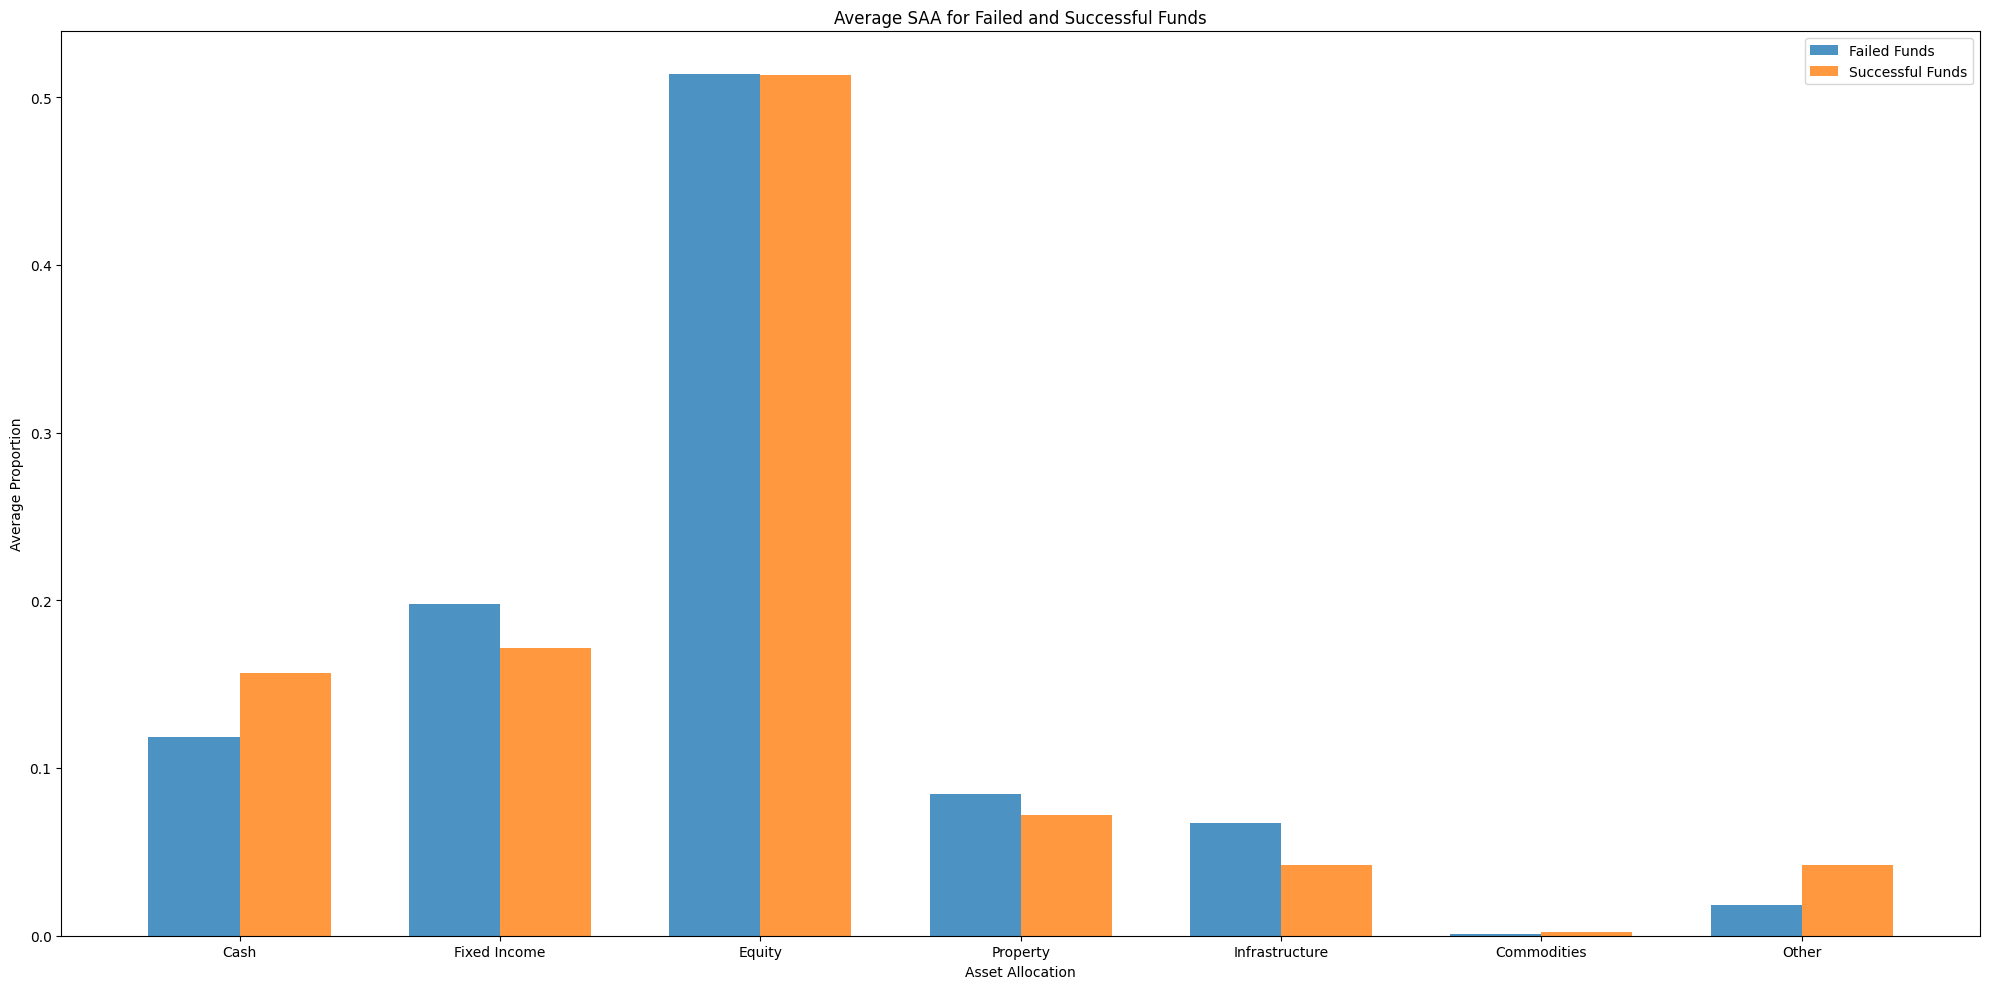

In [16]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(short_saa_labels))

# Plot bars
bar1 = plt.bar(index, avg_saa_failed, bar_width, label='Failed Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_successful, bar_width, label='Successful Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Asset Allocation')
plt.ylabel('Average Proportion')
plt.title('Average SAA for Failed and Successful Funds')
plt.xticks(index + bar_width / 2, short_saa_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## Average Age Between Fail and Non-fail Funds

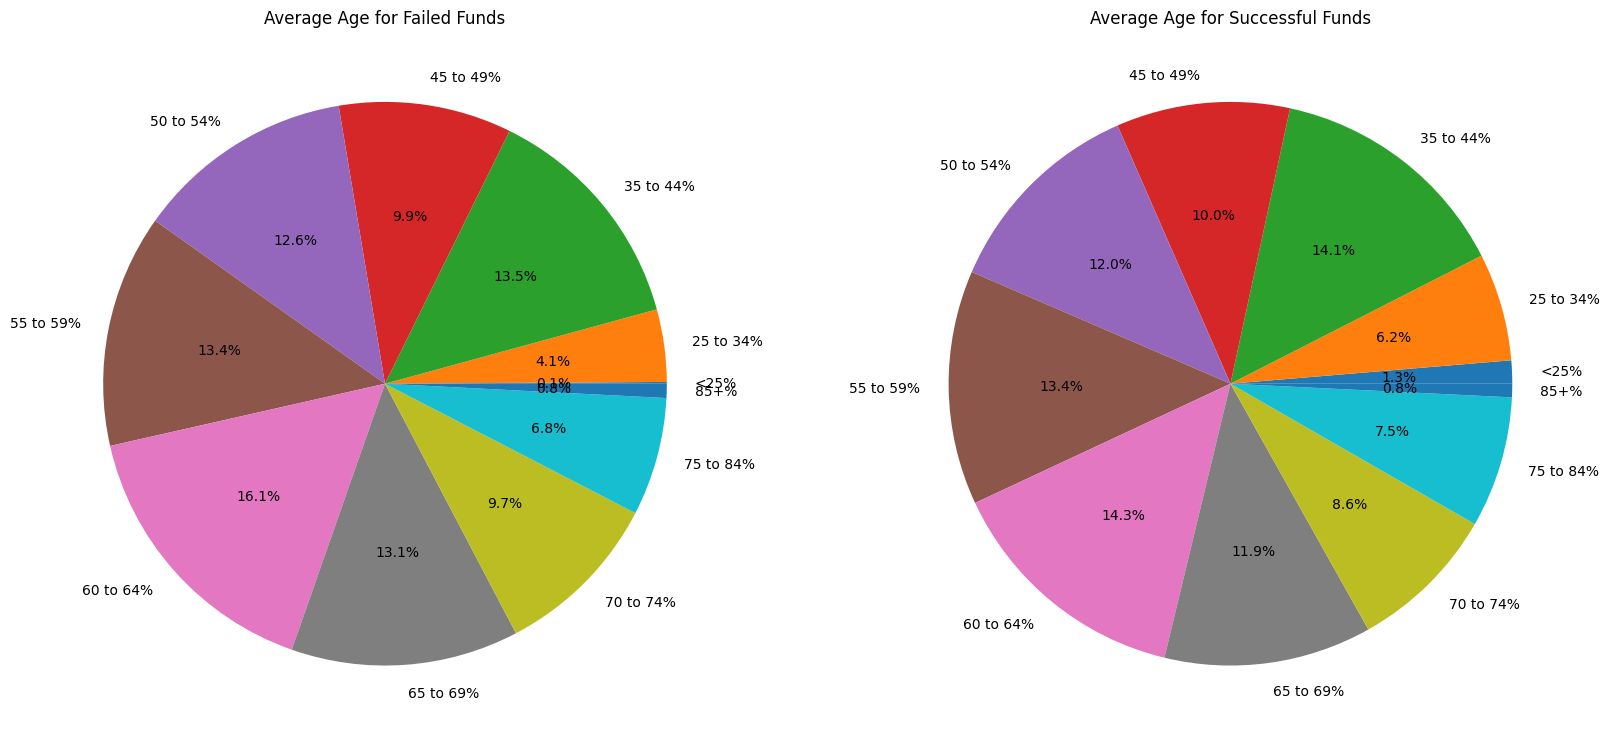

In [37]:
saa_columns = [
     '<25%',
 '25 to 34%',
 '35 to 44%',
 '45 to 49%',
 '50 to 54%',
 '55 to 59%',
 '60 to 64%',
 '65 to 69%',
 '70 to 74%',
 '75 to 84%',
 '85+%'
]

# Filter DataFrame for the period 2021-2022
start_date = pd.Timestamp('2021-06-30')
end_date = pd.Timestamp('2022-06-30')
funds_2021_2022 = merged_df[(merged_df['Period'] >= start_date) & (merged_df['Period'] <= end_date)]

# Separate the funds based on the 'Fail' column
failed_funds = funds_2021_2022[funds_2021_2022['Fail'] == 1]
successful_funds = funds_2021_2022[funds_2021_2022['Fail'] == 0]

# Calculate the average SAA for each group
avg_saa_failed = failed_funds[saa_columns].mean()
avg_saa_successful = successful_funds[saa_columns].mean()

# Handle NaN values
avg_saa_failed.fillna(0, inplace=True)
avg_saa_successful.fillna(0, inplace=True)

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Pie chart for Failed Funds
axes[0].pie(avg_saa_failed, labels=saa_columns, autopct='%1.1f%%')
axes[0].set_title('Average Age for Failed Funds')

# Pie chart for Successful Funds
axes[1].pie(avg_saa_successful, labels=saa_columns, autopct='%1.1f%%')
axes[1].set_title('Average Age for Successful Funds')

plt.show()

In [38]:
from scipy.stats import ttest_ind

# Perform t-test for each asset allocation category
for column in saa_columns:
    t_stat, p_value = ttest_ind(failed_funds[column], successful_funds[column], nan_policy='omit')  # omit NaN values
    print(f"t-test for {column}: t = {t_stat:.2f}, p = {p_value:.4f}")


t-test for <25%: t = -0.75, p = 0.4567
t-test for 25 to 34%: t = -0.43, p = 0.6674
t-test for 35 to 44%: t = 0.54, p = 0.5906
t-test for 45 to 49%: t = 0.89, p = 0.3740
t-test for 50 to 54%: t = 1.25, p = 0.2125
t-test for 55 to 59%: t = 0.97, p = 0.3337
t-test for 60 to 64%: t = 1.85, p = 0.0655
t-test for 65 to 69%: t = 1.36, p = 0.1765
t-test for 70 to 74%: t = 1.16, p = 0.2475
t-test for 75 to 84%: t = 0.19, p = 0.8518
t-test for 85+%: t = 0.38, p = 0.7032


In [149]:
#Normalization: If you want the values to sum up to 100 (or 1), you can normalize the values. This can be done by dividing each value by the sum of all values.
avg_saa_failed = avg_saa_failed / avg_saa_failed.sum()
avg_saa_successful = avg_saa_successful / avg_saa_successful.sum()
avg_age_2021_2022 = avg_age_2021_2022 / avg_age_2021_2022.sum()
avg_saa_2021_2022 = avg_saa_2021_2022 / avg_saa_2021_2022.sum()

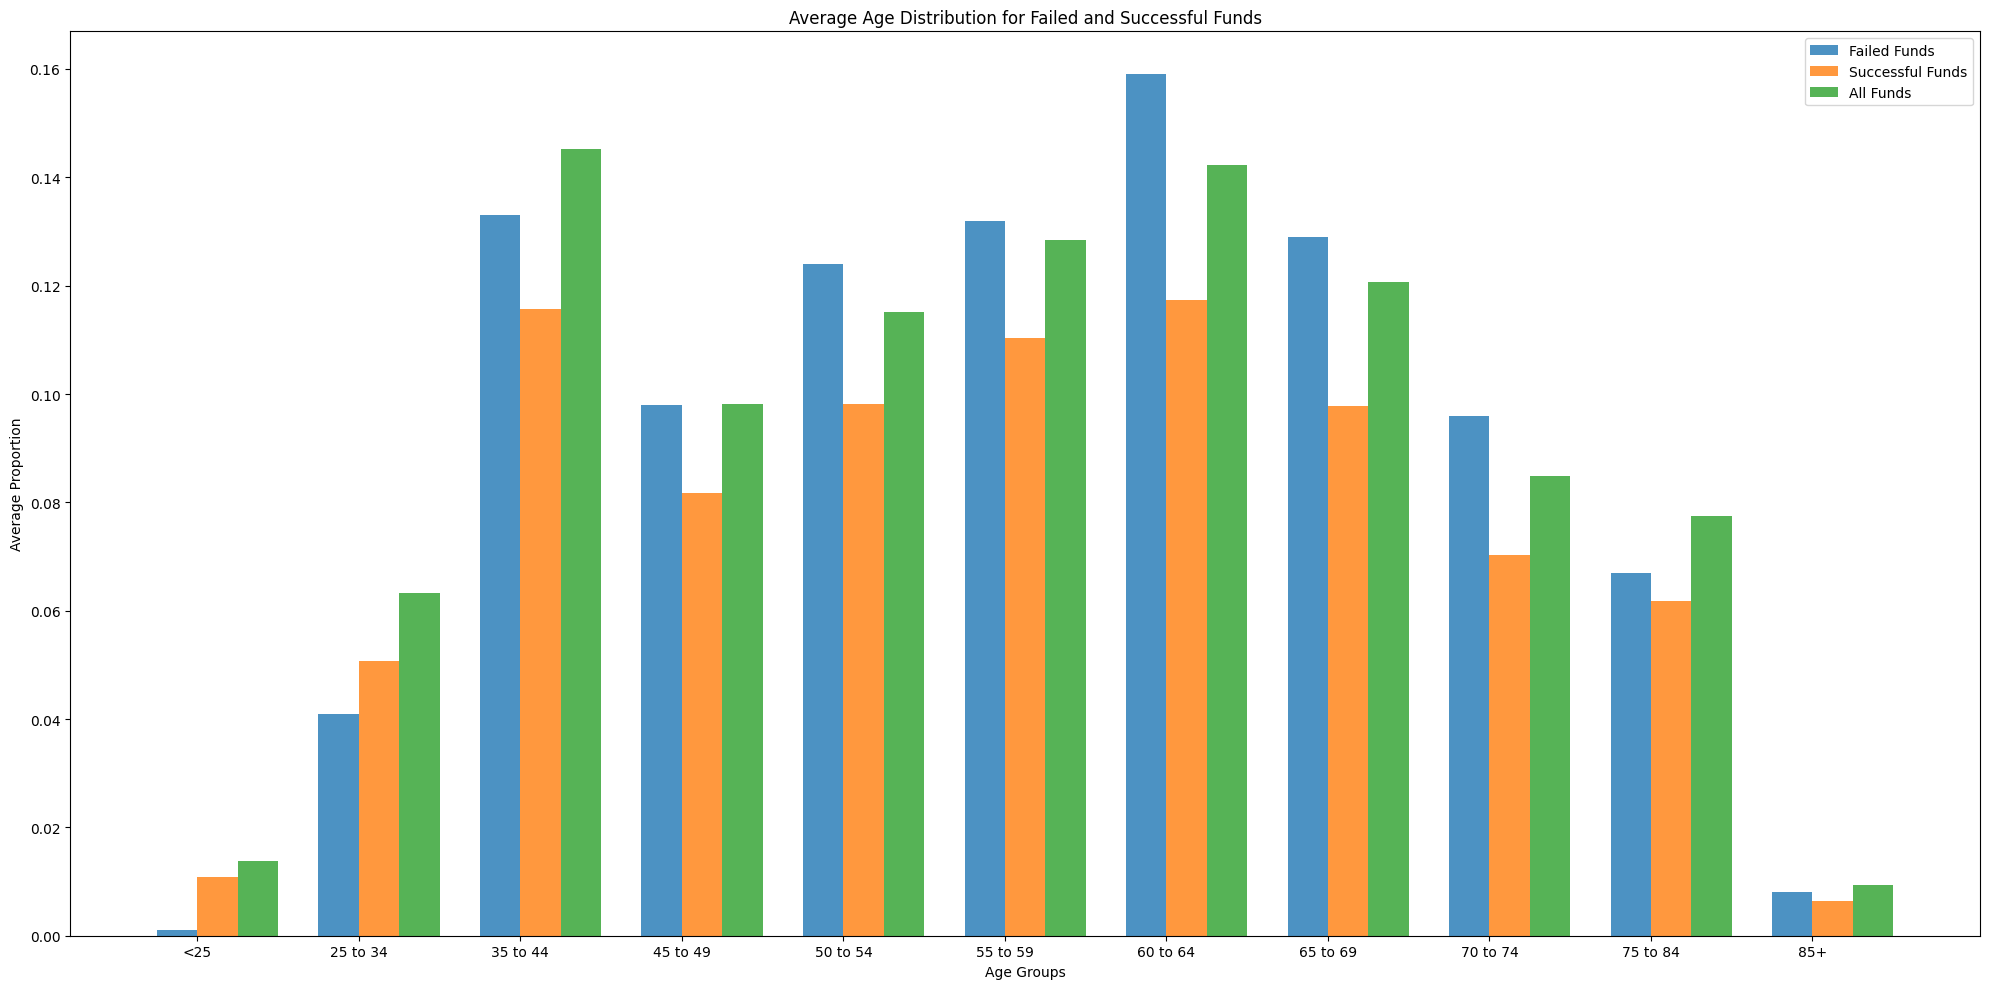

Total for Target Funds: 0.988
Total for Acquiring Funds: 0.8212096774193549
Total for All Funds: 0.9984705882352941


In [30]:
# From the above filtered data, further filter rows where more than one column is equal to 0
filtered_df_2021_2022 = funds_2021_2022[saa_columns][funds_2021_2022[saa_columns].apply(lambda row: (row == 0).sum(), axis=1) <= 1]

# Calculate the average SAA for the filtered data in the specified time frame
avg_age_2021_2022 = filtered_df_2021_2022.mean()


# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.25
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_failed, bar_width, label='Failed Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_successful, bar_width, label='Successful Funds', alpha=0.8)
bar3 = plt.bar(index + 2*bar_width, avg_age_2021_2022, bar_width, label='All Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Average Age Distribution for Failed and Successful Funds')
plt.xticks(index + bar_width / 2, short_age_labels)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

# Print totals for each set of bars
print("Total for Target Funds:", calculate_total(bar1))
print("Total for Acquiring Funds:", calculate_total(bar2))
print("Total for All Funds:", calculate_total(bar3))

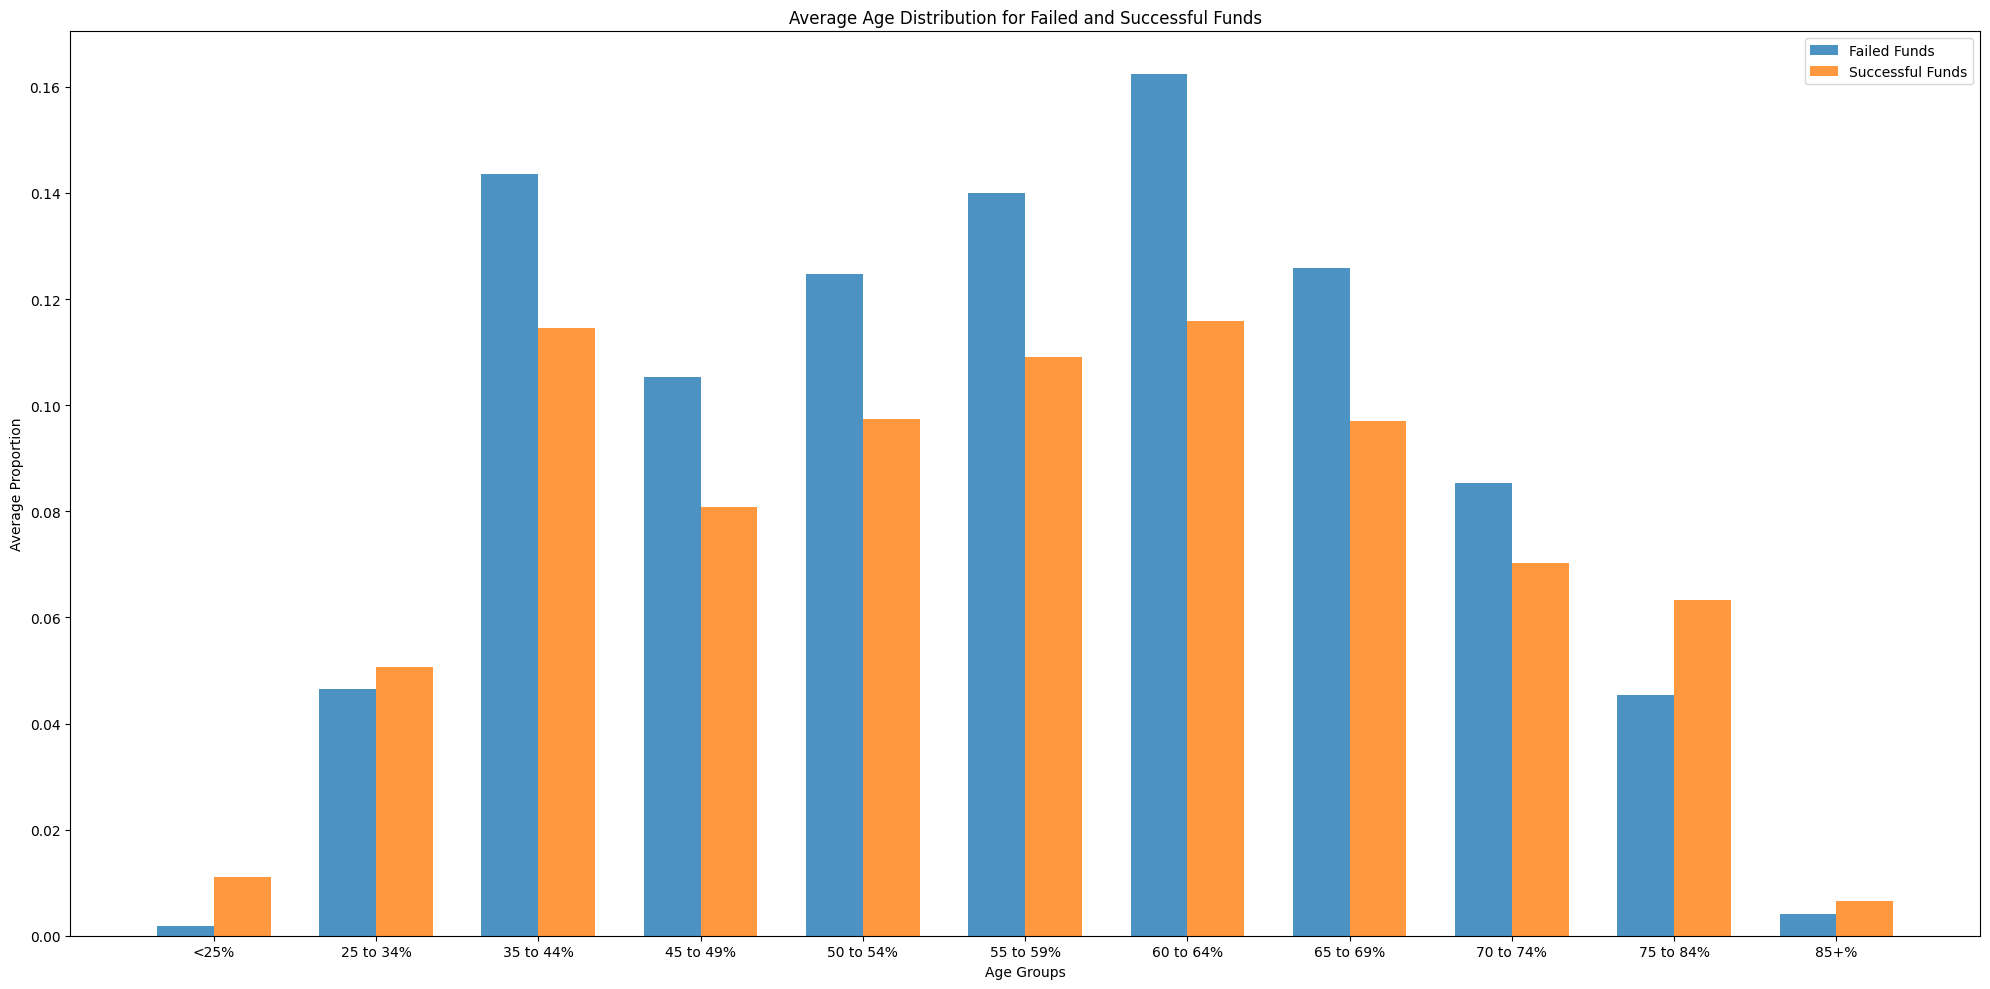

In [31]:
# Create bar chart
fig, ax = plt.subplots(figsize=(20, 10))

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(saa_columns))

# Plot bars
bar1 = plt.bar(index, avg_saa_failed, bar_width, label='Failed Funds', alpha=0.8)
bar2 = plt.bar(index + bar_width, avg_saa_successful, bar_width, label='Successful Funds', alpha=0.8)

# Add some text for labels, title, and axes ticks
plt.xlabel('Age Groups')
plt.ylabel('Average Proportion')
plt.title('Average Age Distribution for Failed and Successful Funds')
plt.xticks(index + bar_width / 2, saa_columns)  # Position the age group labels in the center of the grouped bars
plt.legend()

plt.tight_layout()
plt.show()

## SAA For Target and Acquiring Funds - Period before Merger

No matching acquiring fund for SPSL Master Trust at 2023-06-30 00:00:00


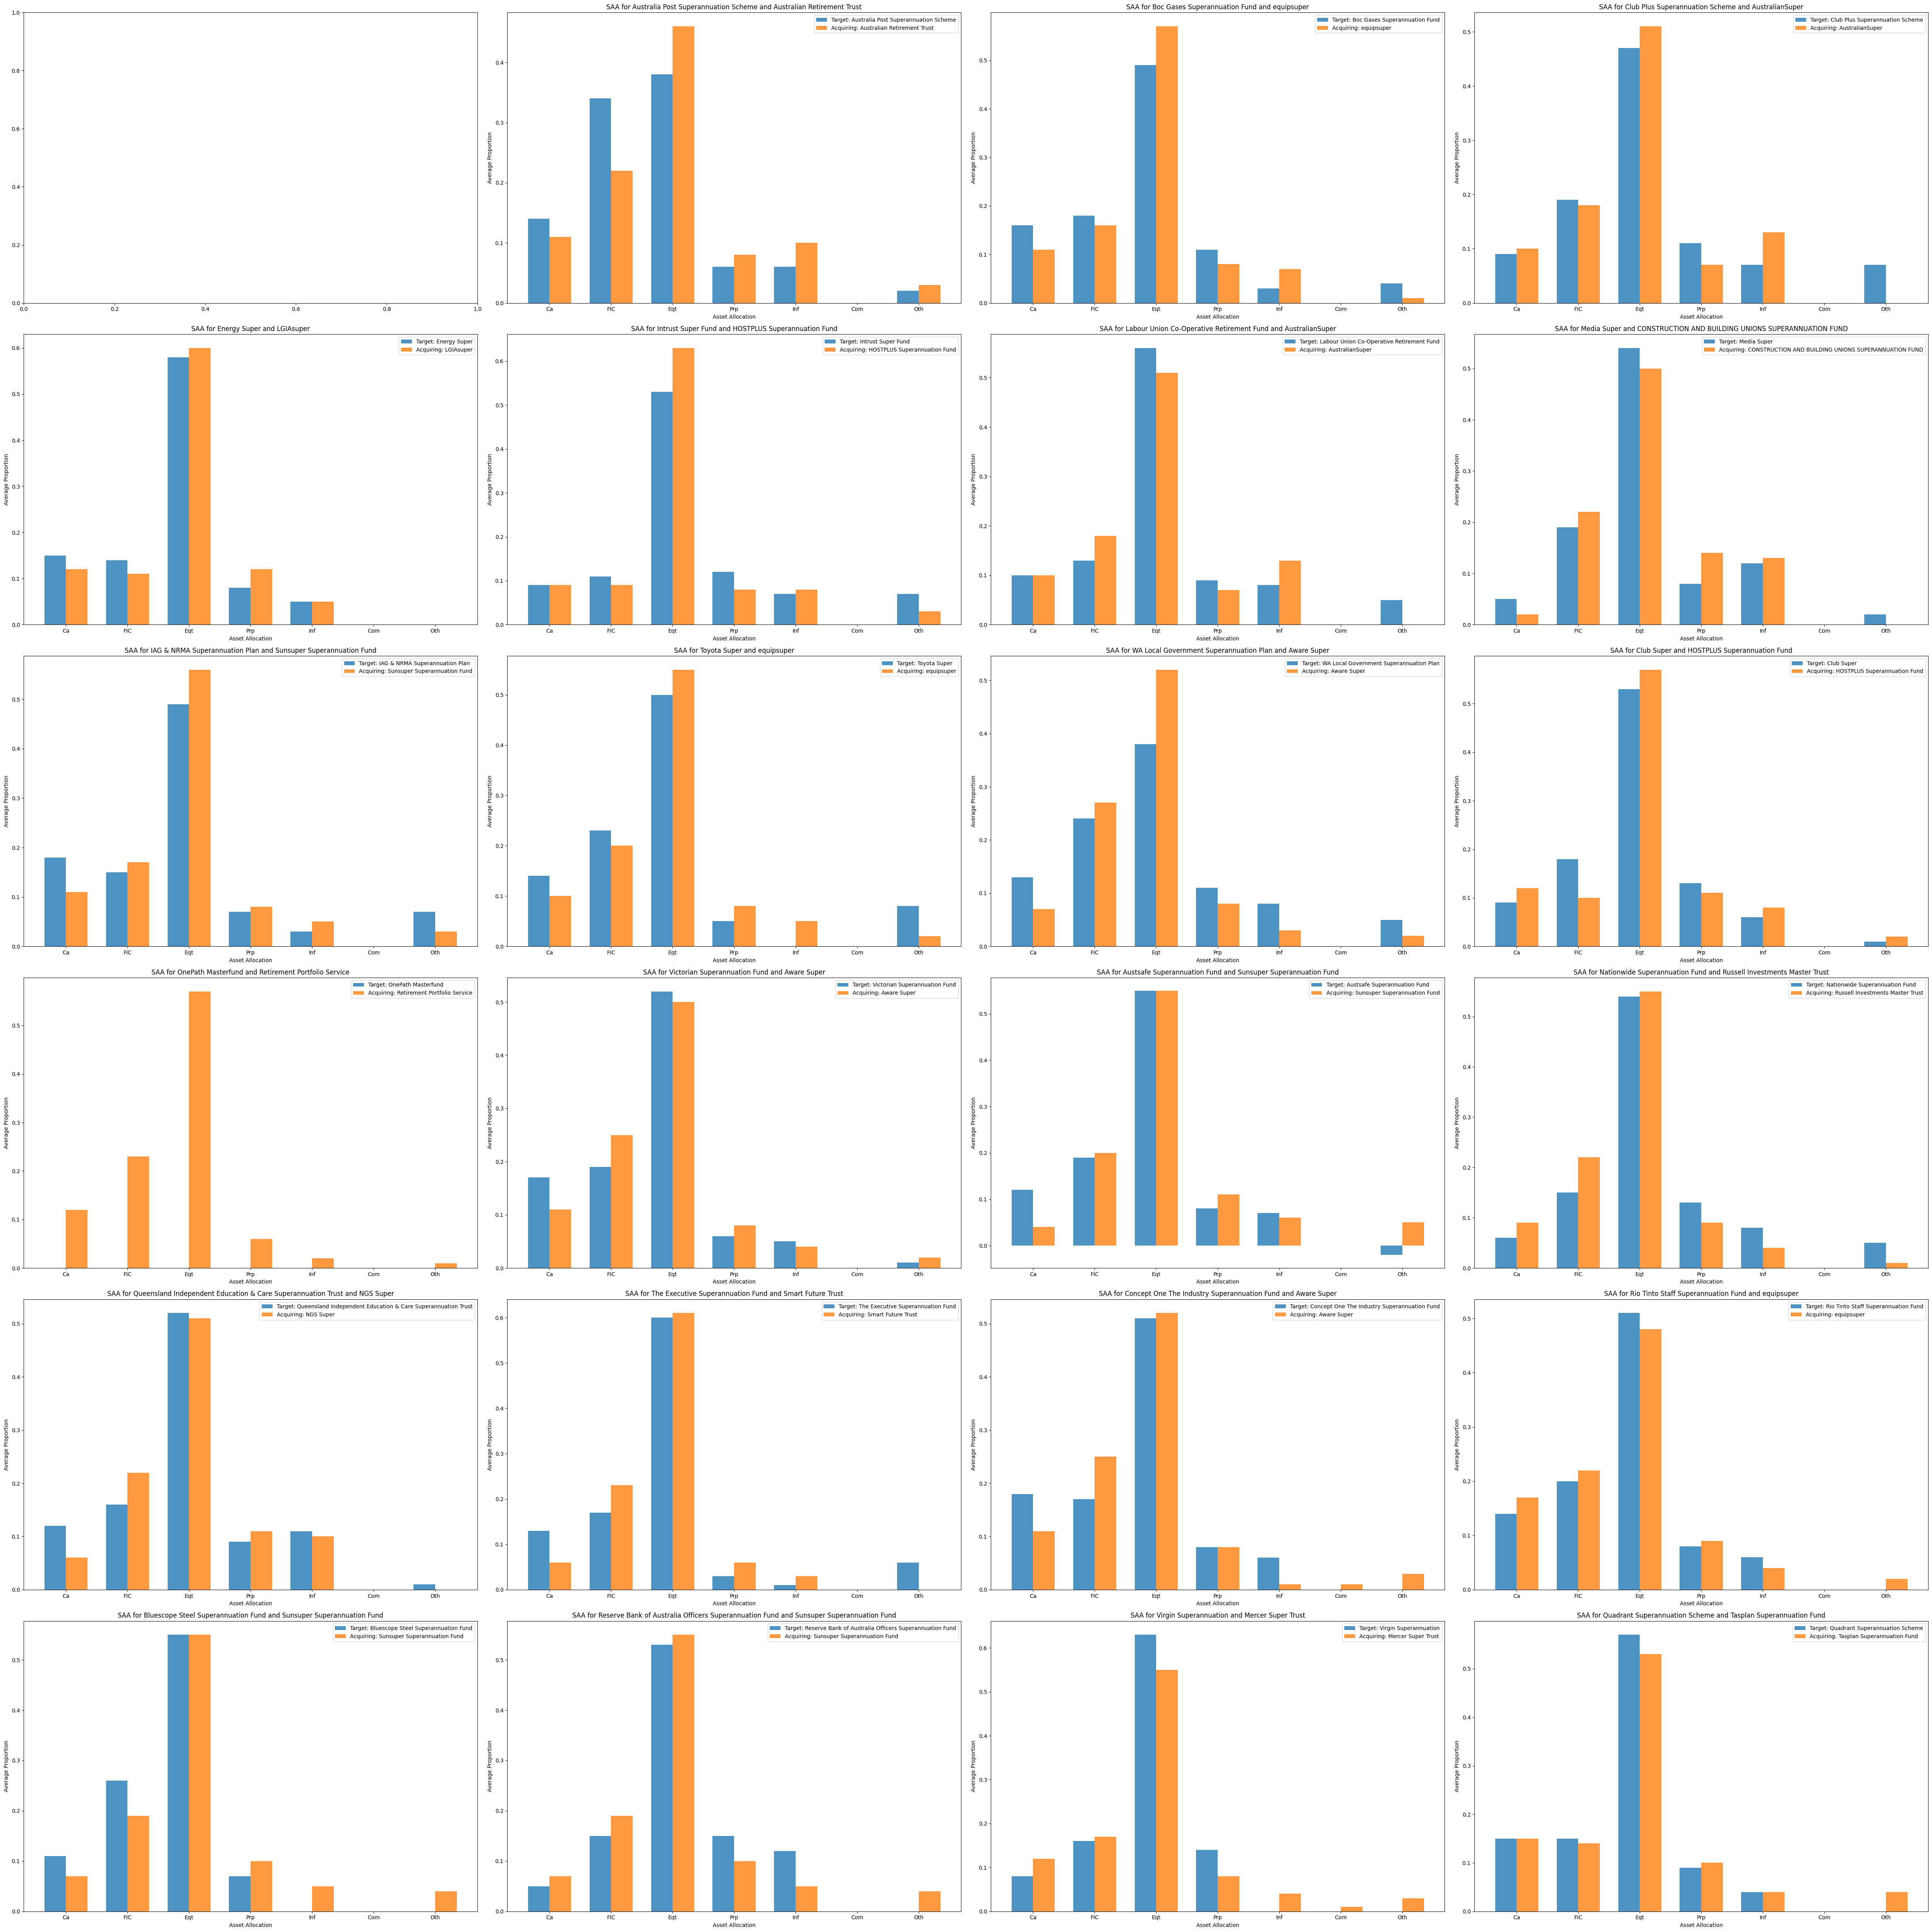

In [54]:
# Filter DataFrames
merged_funds = merged_df[merged_df['Merged'] == 1]
merger_funds = merged_df[merged_df['Merger'] == 1]

# Columns to consider for SAA
saa_columns = [
    'Proportion of investments in cash',
    'Proportion of investments in  fixed income',
    'Proportion of investments in equity',
    'Proportion of investments in property',
    'Proportion of investments in infrastructure',
    'Proportion of investments in commodities',
    'Proportion of investments in other'
]

# Shorter labels for the asset allocation categories
short_saa_labels = ['Ca', 'FIC', 'Eqt', 'Prp', 'Inf', 'Com', 'Oth']

# Create a 6x4 grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(50, 50))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique merger
for i, (index, row) in enumerate(merged_funds.iterrows()):
    target_fund = row['Fund name']
    acquiring_fund = row['Acquirer']
    period = row['Period']
    
    # Find the corresponding acquiring fund data for the period after the merger (t+1)
    next_period = period + pd.DateOffset(years=1)
    acquiring_data_next = merger_funds[(merger_funds['Fund name'] == acquiring_fund) & (merger_funds['Period'] == next_period)]
    
    if acquiring_data_next.empty:
        print(f"No matching acquiring fund for {target_fund} at {next_period}")
        continue
    
    avg_saa_target = merged_funds.loc[index, saa_columns]
    avg_saa_acquiring = acquiring_data_next.iloc[0][saa_columns]
    
    # Set the positions and width for the bars
    bar_width = 0.35
    index = np.arange(len(short_saa_labels))
    
    # Plot bars on the i-th subplot
    ax = axes[i]
    bar1 = ax.bar(index, avg_saa_target, bar_width, label=f'Target: {target_fund}', alpha=0.8)
    bar2 = ax.bar(index + bar_width, avg_saa_acquiring, bar_width, label=f'Acquiring: {acquiring_fund}', alpha=0.8)
    
    # Add some text for labels, title, and axes ticks
    ax.set_xlabel('Asset Allocation')
    ax.set_ylabel('Average Proportion')
    ax.set_title(f'SAA for {target_fund} and {acquiring_fund}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(short_saa_labels)
    ax.legend()

plt.tight_layout()
plt.show()

## Age for Target and Acquiring Funds - Period Before Merger

No matching acquiring fund for SPSL Master Trust at 2023-06-30 00:00:00


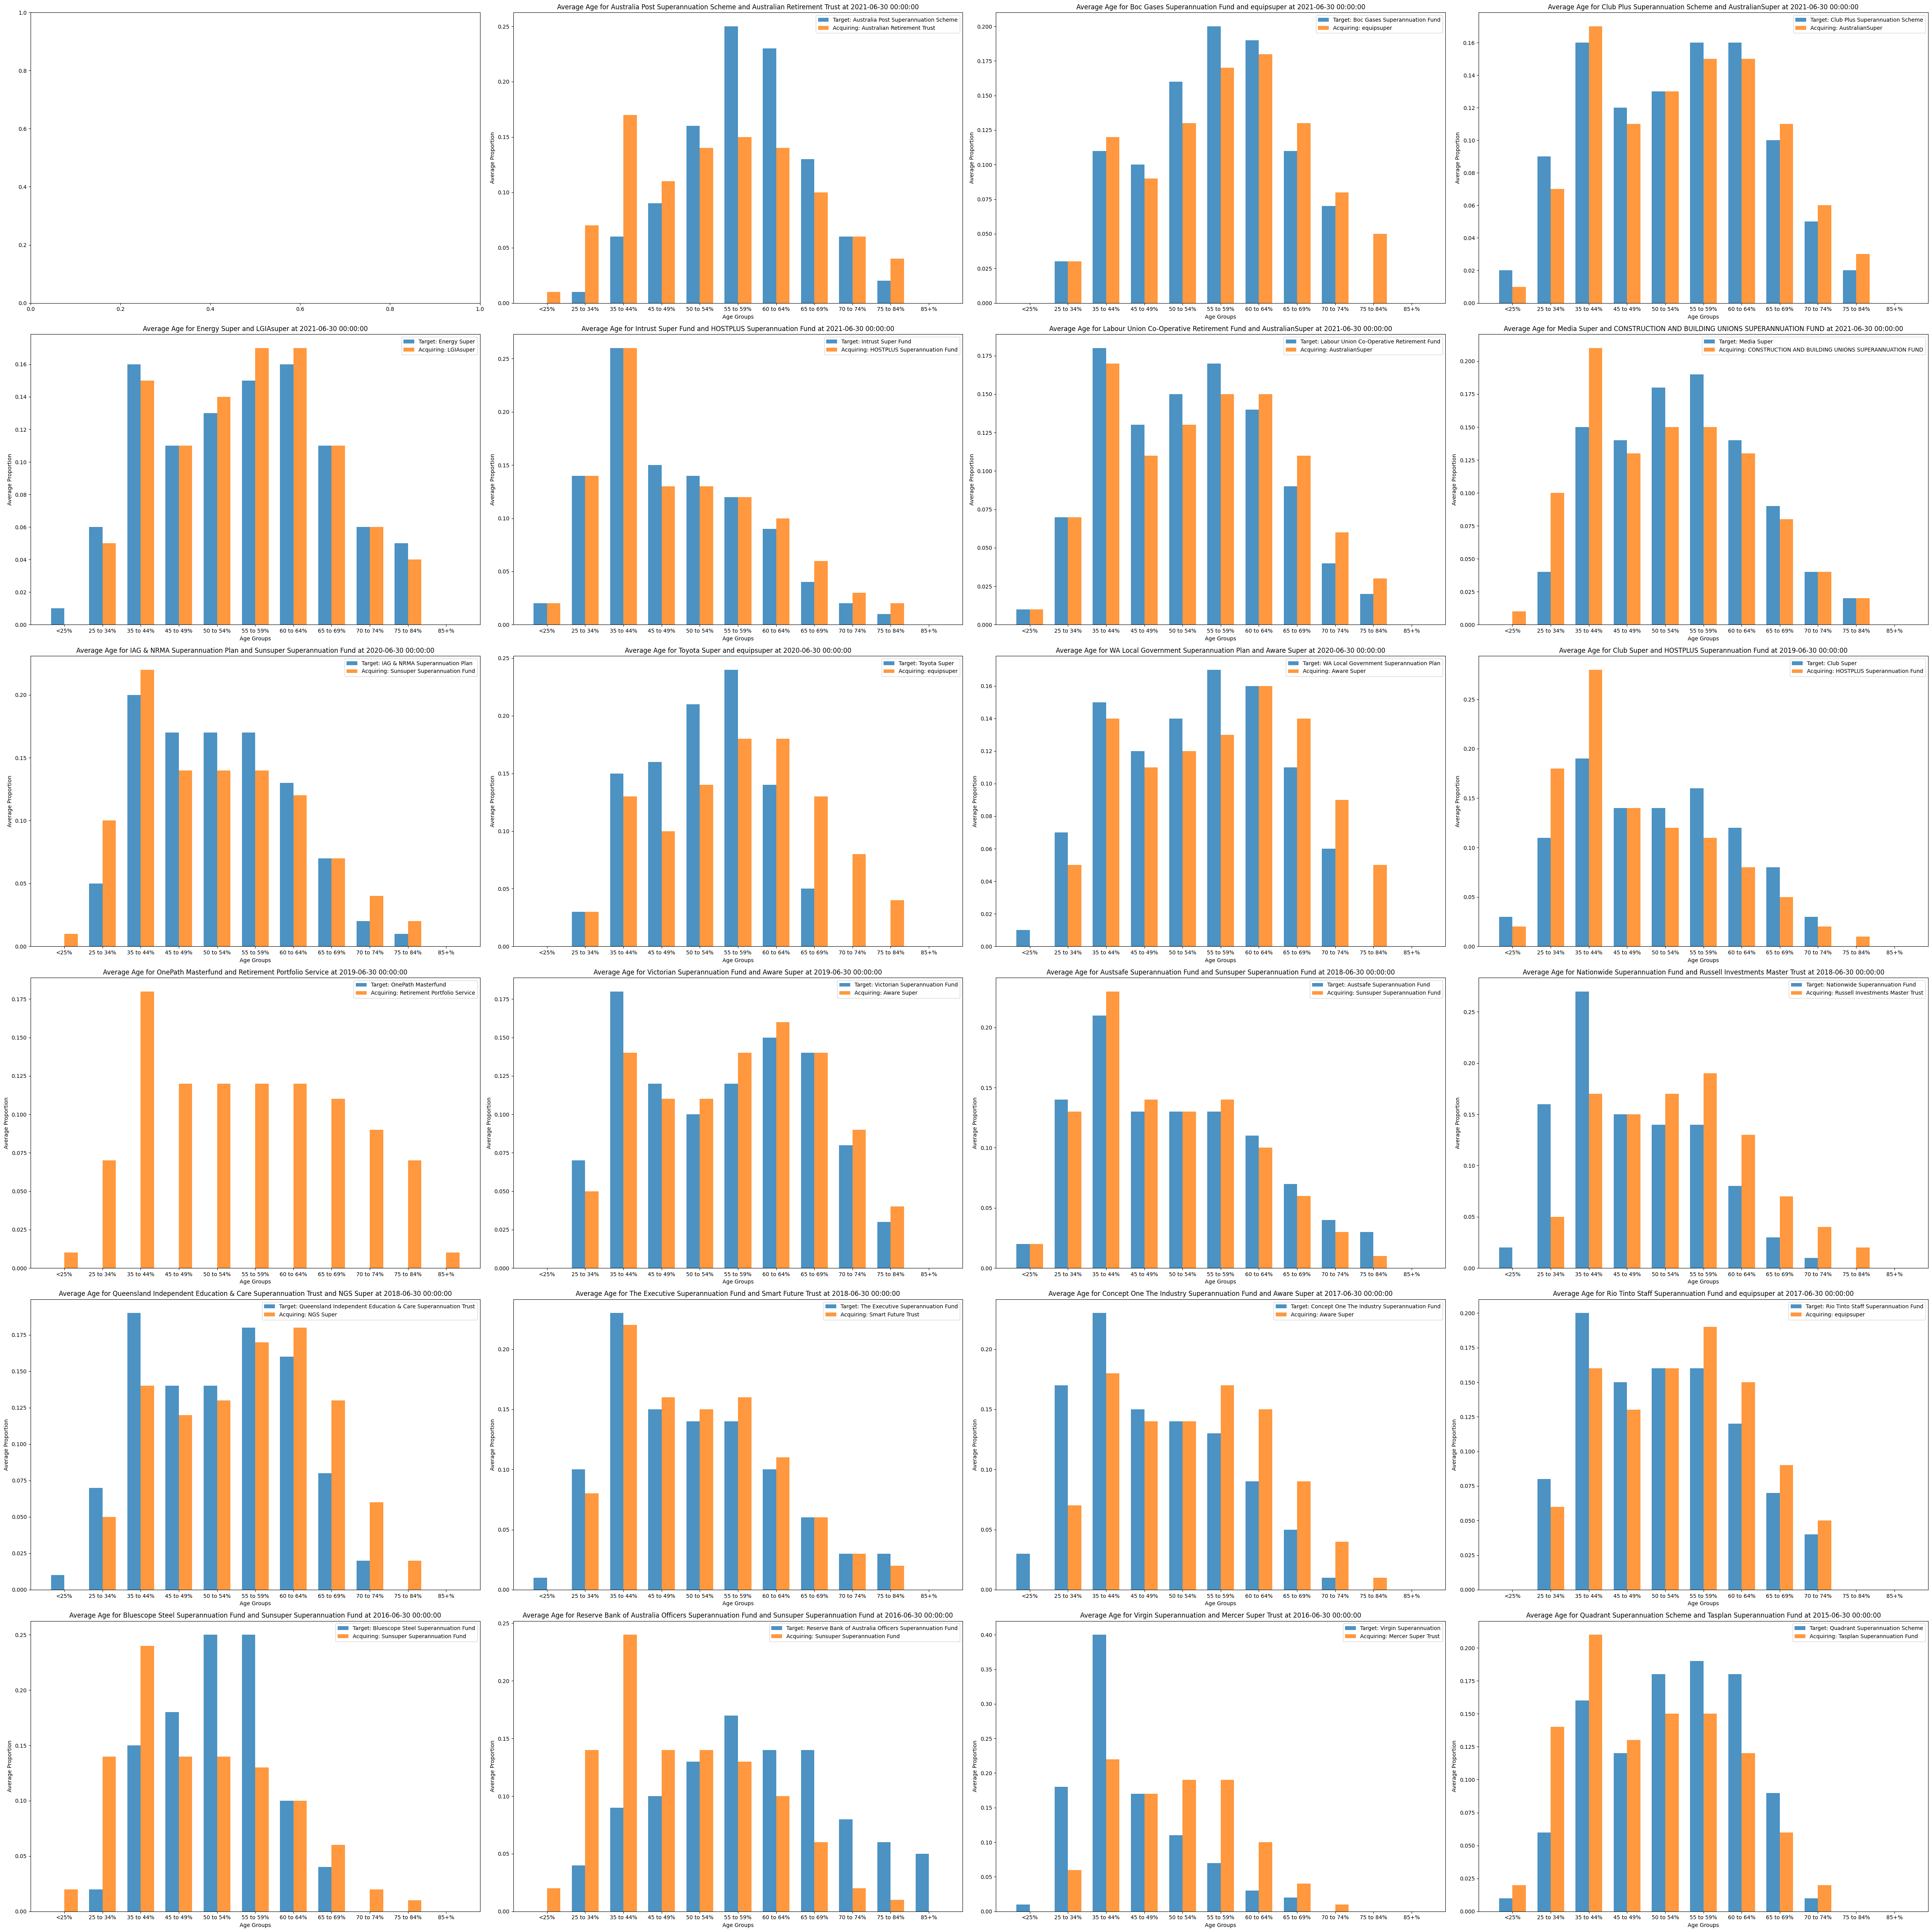

In [49]:
# Filter DataFrames
merged_funds = merged_df[merged_df['Merged'] == 1]
merger_funds = merged_df[merged_df['Merger'] == 1]

# Columns to consider for Age
age_columns = [
    '<25%',
    '25 to 34%',
    '35 to 44%',
    '45 to 49%',
    '50 to 54%',
    '55 to 59%',
    '60 to 64%',
    '65 to 69%',
    '70 to 74%',
    '75 to 84%',
    '85+%'
]

# Create a 6x4 grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(50, 50))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each unique merger
for i, (index, row) in enumerate(merged_funds.iterrows()):
    target_fund = row['Fund name']
    acquiring_fund = row['Acquirer']
    period = row['Period']
    
    # Find the corresponding acquiring fund data for the period after the merger (t+1)
    next_period = period + pd.DateOffset(years=1)
    acquiring_data_next = merger_funds[(merger_funds['Fund name'] == acquiring_fund) & (merger_funds['Period'] == next_period)]
    
    if acquiring_data_next.empty:
        print(f"No matching acquiring fund for {target_fund} at {next_period}")
        continue
    
    avg_age_target = merged_funds.loc[index, age_columns]
    avg_age_acquiring = acquiring_data_next.iloc[0][age_columns]
    
    # Set the positions and width for the bars
    bar_width = 0.35
    index = np.arange(len(age_columns))
    
    # Plot bars on the i-th subplot
    ax = axes[i]
    bar1 = ax.bar(index, avg_age_target, bar_width, label=f'Target: {target_fund}', alpha=0.8)
    bar2 = ax.bar(index + bar_width, avg_age_acquiring, bar_width, label=f'Acquiring: {acquiring_fund}', alpha=0.8)
    
    # Add some text for labels, title, and axes ticks
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Average Proportion')
    ax.set_title(f'Average Age for {target_fund} and {acquiring_fund} at {period}')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(age_columns)
    ax.legend()

plt.tight_layout()
plt.show()